# Block 1

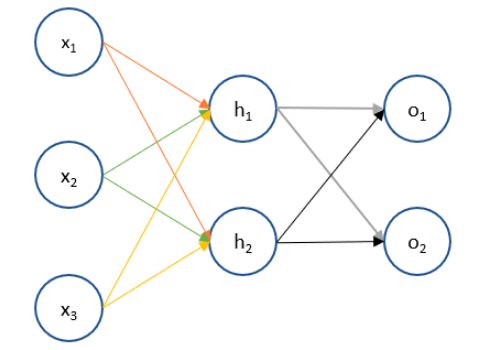

In [24]:
from IPython.display import Image
Image("ex41.png")

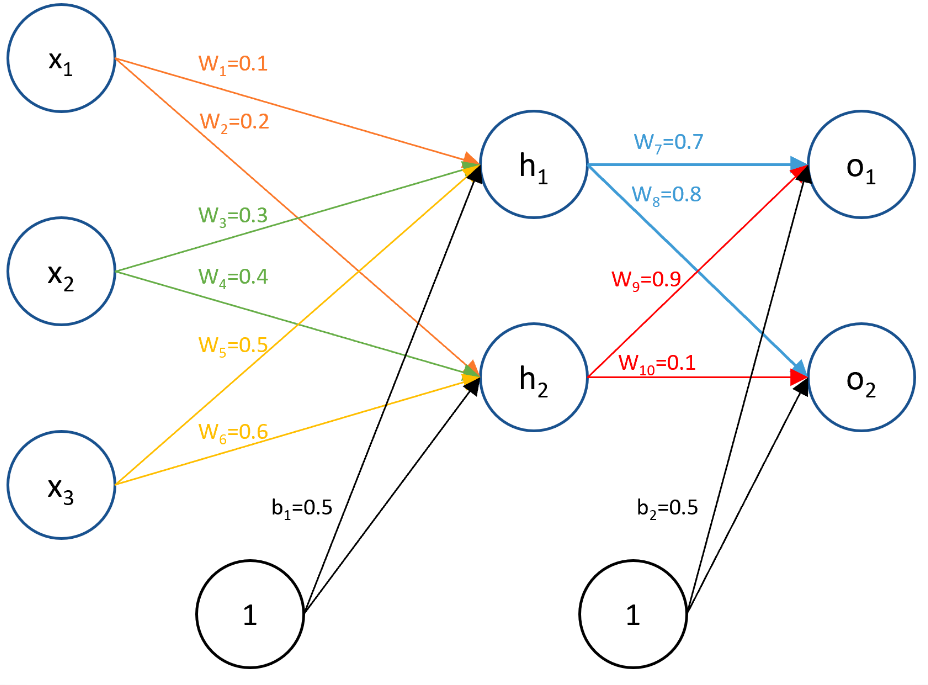

In [34]:
from IPython.display import Image
Image("ex42.png", height=500, width=500)

In [3]:
import numpy as np
import pandas as pd 
%matplotlib inline 

In [4]:
numIter = 10000

#Initialize variables

w1 = 0.1
w2= 0.2
w3= 0.3
w4= 0.4
w5= 0.5
w6= 0.6
w7= 0.7
w8= 0.8
w9= 0.9
w10= 0.1

wList = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]

b1 = 0.5
b2 = 0.5 
bList = [b1, b2]

#Input and target values 
x1 = 1
x2 = 4
x3 = 5
xList = [x1, x2, x3]

t1 = 0.1
t2 = 0.05
tList = [t1, t2]

#set learning rate 
alpha = 0.01



In [5]:
def sigmoid(x):
    return np.divide(1, (1 + np.exp(-x)))

In [6]:
def forwardProp(xList, wList, bList):
    zh1 = wList[0] * xList[0] + wList[2] * xList[1] + wList[4] * xList[2] + bList[0]
    zh2 = wList[1] * xList[0] + wList[3] * xList[1] + wList[5] * xList[2] + bList[0]
    
    h1 = sigmoid(zh1)
    h2 = sigmoid(zh2)
    
    zo1 = wList[6]*h1 + wList[8]*h2 + bList[1]
    zo2 = wList[7]*h1 + wList[9]*h2 + bList[1]
    
    o1 = sigmoid(zo1)
    o2 = sigmoid(zo2)
    return h1, h2, o1, o2
    

In [7]:
def error(oList, tList):
    return 0.5 * (np.power(oList[0] - tList[0], 2) + np.power(oList[1] - tList[1], 2))

In [8]:
errList = []
for i in range(numIter):
    #Forward propagation
    
    h1, h2, o1, o2 = forwardProp(xList, wList, bList)
    
    # compute error
    
    sse = error([o1, o2], tList)
    errList.append(sse)
    
    print('Running' + str(i + 1) + 'of' + str(numIter))
    print('o1:' + str(o1))
    print('t2:' + str(t1))
    print('o2:' + str(o2))
    print('t2:' + str(t2))
    print('error:' + str(sse))
    print('')
    
    
    # Error derivative calculations 
    # compute dE_dw7
    
    dE_do1 = o1-t1
    do1_dzo1 = o1*(1-o1)
    dzo1_dw7 = h1
    dE_dw7 = dE_do1* do1_dzo1*dzo1_dw7
    
    #compute dE_dw8
    
    dE_do2 = o2-t2
    do2_dzo2 = o2*(1-o2)
    dzo2_dw8 = h1
    dE_dw8 = dE_do2*do2_dzo2*dzo2_dw8
    
    #compute dE_dw9
    dzo1_dw9 = h2
    dE_dw9 = dE_do1*do1_dzo1*dzo1_dw9
    
    #compute dE_dw10
    dzo2_dw10 =h2
    dE_dw10 = dE_do2*do2_dzo2 * dzo2_dw10
    
    
    #compute dE_db2
    dzo1_db2 = 1
    dzo2_db2 = 1
    dE_db2 = dE_do1 * do1_dzo1*dzo1_db2+dE_do2*do2_dzo2*dzo2_db2
    
    #compute dE_dh1 first
    
    dzo1_dh1 = w7
    dzo2_dh1 = w8
    dE_dh1 = dE_do1*do1_dzo1*dzo1_dh1 + dE_do2*do2_dzo2*dzo2_dh1
    
    #compute dE_dw1
    
    dh1_dzh1 = h1*(1-h1)
    dzh1_dw1 = x1
    dE_dw1 = dE_dh1 * dh1_dzh1*dzh1_dw1
    
    #compute dE_dw3
    dzh1_dw3 = x2
    dE_dw3 = dE_dh1*dh1_dzh1*dzh1_dw3
    
    #compute dE_dw5
    
    dzh1_dw5 = x3
    dE_dw5 = dE_dh1*dh1_dzh1*dzh1_dw5
    
    #compute dE_dh2 first
    dzo1_dh2 = w9
    dzo2_dh2 = w10
    
    dE_dh2 = dE_do1*do1_dzo1*dzo1_dh2 + dE_do2*do2_dzo2*dzo2_dh2
    
    #compute dE_dw2 
    dh2_dzh2 = h2*(1-h2)
    dzh2_dw2 = x1
    dE_dw2 = dE_dh2*dh2_dzh2*dzh2_dw2
    
    #compute dE_dw4
    dzh2_dw4 = x2
    dE_dw4 = dE_dh2*dh2_dzh2*dzh2_dw4
    
    #compute dE_dw6
    dzh2_dw6 =x3
    dE_dw6 =dE_dh2 * dh2_dzh2*dzh2_dw6
    
    #compute dE_db1
    dzh1_db1 = 1
    dzh2_db1 = 1
    term1 = dE_do1*do1_dzo1*dzo1_dh1*dh1_dzh1*dzh1_db1
    term2 = dE_do2*do2_dzo2*dzo2_dh2*dh2_dzh2*dzh2_db1
    
    dE_db1 = term1 + term2
    
    #Update all parameters 
    
    w1 = w1-alpha *dE_dw1
    w2 = w2-alpha *dE_dw2
    w3 = w3-alpha *dE_dw3
    w4 = w4-alpha *dE_dw4
    w5 = w5-alpha *dE_dw5
    w6 = w6-alpha *dE_dw6
    w7 = w7-alpha *dE_dw7
    w8 = w8-alpha *dE_dw8
    w9 = w9-alpha *dE_dw9
    w10 = w10-alpha *dE_dw10
    
    b1 = b1-alpha *dE_db1
    b2 = b2-alpha*dE_db2
    
    wList = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
    bList = [b1, b2]
    
    
    
    
    

Running1of10000
o1:0.889550613969795
t2:0.1
o2:0.8003996080673895
t2:0.05
error:0.593244871903886

Running2of10000
o1:0.8892056491141226
t2:0.1
o2:0.7997057530276107
t2:0.05
error:0.5924521363581702

Running3of10000
o1:0.8888590221347764
t2:0.1
o2:0.7990088512386248
t2:0.05
error:0.59165640801862

Running4of10000
o1:0.888510724416747
t2:0.1
o2:0.798308893819527
t2:0.05
error:0.5908576815448137

Running5of10000
o1:0.8881607473173765
t2:0.1
o2:0.797605871973965
t2:0.05
error:0.590055951710919

Running6of10000
o1:0.8878090821666709
t2:0.1
o2:0.7968997769923419
t2:0.05
error:0.5892512134077512

Running7of10000
o1:0.8874557202676223
t2:0.1
o2:0.7961906002540403
t2:0.05
error:0.5884434616448424

Running8of10000
o1:0.8871006528965382
t2:0.1
o2:0.7954783332296675
t2:0.05
error:0.58763269155252

Running9of10000
o1:0.886743871303382
t2:0.1
o2:0.7947629674833233
t2:0.05
error:0.586818898383999

Running10of10000
o1:0.8863853667121215
t2:0.1
o2:0.7940444946748861
t2:0.05
error:0.5860020775174823

R

t2:0.05
error:0.19919161109080602

Running365of10000
o1:0.6125075784380174
t2:0.1
o2:0.4159768588588551
t2:0.05
error:0.1983015395882975

Running366of10000
o1:0.6114424741191394
t2:0.1
o2:0.41504281938682624
t2:0.05
error:0.19741483215949485

Running367of10000
o1:0.6103779112217923
t2:0.1
o2:0.41411175594086214
t2:0.05
error:0.19653149153872884

Running368of10000
o1:0.6093139134598768
t2:0.1
o2:0.41318366986201466
t2:0.05
error:0.1956515202491279

Running369of10000
o1:0.6082505044244888
t2:0.1
o2:0.41225856230032865
t2:0.05
error:0.1947749206038242

Running370of10000
o1:0.6071877075814818
t2:0.1
o2:0.4113364342169309
t2:0.05
error:0.19390169470718255

Running371of10000
o1:0.6061255462690691
t2:0.1
o2:0.41041728638612085
t2:0.05
error:0.19303184445604937

Running372of10000
o1:0.6050640436954684
t2:0.1
o2:0.4095011193974648
t2:0.05
error:0.19216537154102414

Running373of10000
o1:0.6040032229365863
t2:0.1
o2:0.40858793365789264
t2:0.05
error:0.19130227744775175

Running374of10000
o1:0.602

t2:0.05
error:0.05004764271736379

Running695of10000
o1:0.3552083473938891
t2:0.1
o2:0.23605415283212633
t2:0.05
error:0.0498737241828001

Running696of10000
o1:0.3547365391873035
t2:0.1
o2:0.23577025742654784
t2:0.05
error:0.049700646470725245

Running697of10000
o1:0.3542661595512489
t2:0.1
o2:0.23548727596532396
t2:0.05
error:0.04952840471898869

Running698of10000
o1:0.35379720342816434
t2:0.1
o2:0.23520520436063885
t2:0.05
error:0.04935699409511153

Running699of10000
o1:0.35332966577229324
t2:0.1
o2:0.23492403854545046
t2:0.05
error:0.04918640979613052

Running700of10000
o1:0.352863541549792
t2:0.1
o2:0.23464377447339538
t2:0.05
error:0.04901664704844272

Running701of10000
o1:0.3523988257388364
t2:0.1
o2:0.23436440811869388
t2:0.05
error:0.04884770110764992

Running702of10000
o1:0.351935513329725
t2:0.1
o2:0.23408593547605472
t2:0.05
error:0.048679567258403104

Running703of10000
o1:0.3514735993249802
t2:0.1
o2:0.23380835256058016
t2:0.05
error:0.0485122408142476

Running704of10000
o1

o1:0.24391285997318
t2:0.1
o2:0.1693270602447058
t2:0.05
error:0.01747492928615188

Running1078of10000
o1:0.24373749297085887
t2:0.1
o2:0.16922007956199614
t2:0.05
error:0.017436947128158194

Running1079of10000
o1:0.24356250069477106
t2:0.1
o2:0.16911331366995938
t2:0.05
error:0.017399086549587134

Running1080of10000
o1:0.243387881981105
t2:0.1
o2:0.16900676190181194
t2:0.05
error:0.017361347038690925

Running1081of10000
o1:0.24321363567060014
t2:0.1
o2:0.16890042359349855
t2:0.05
error:0.017323728086352387

Running1082of10000
o1:0.2430397606085268
t2:0.1
o2:0.16879429808367882
t2:0.05
error:0.017286229186069296

Running1083of10000
o1:0.24286625564466585
t2:0.1
o2:0.16868838471371367
t2:0.05
error:0.01724884983393876

Running1084of10000
o1:0.24269311963328863
t2:0.1
o2:0.16858268282765215
t2:0.05
error:0.017211589528641782

Running1085of10000
o1:0.24252035143313652
t2:0.1
o2:0.16847719177221793
t2:0.05
error:0.01717444777142782

Running1086of10000
o1:0.24234794990740138
t2:0.1
o2:0.168

t2:0.1
o2:0.13967240662439007
t2:0.05
error:0.008668067700373297

Running1460of10000
o1:0.19632265818803293
t2:0.1
o2:0.13961590800887305
t2:0.05
error:0.008654532724331712

Running1461of10000
o1:0.19623489721905746
t2:0.1
o2:0.13955948835439244
t2:0.05
error:0.008641028698531554

Running1462of10000
o1:0.1961472706195727
t2:0.1
o2:0.13950314748636158
t2:0.05
error:0.008627555528779371

Running1463of10000
o1:0.19605977808115854
t2:0.1
o2:0.1394468852307167
t2:0.05
error:0.008614113121239214

Running1464of10000
o1:0.19597241929632878
t2:0.1
o2:0.13939070141391474
t2:0.05
error:0.008600701382430999

Running1465of10000
o1:0.1958851939585281
t2:0.1
o2:0.1393345958629316
t2:0.05
error:0.008587320219228933

Running1466of10000
o1:0.19579810176212833
t2:0.1
o2:0.13927856840525996
t2:0.05
error:0.008573969538859888

Running1467of10000
o1:0.19571114240242513
t2:0.1
o2:0.1392226188689076
t2:0.05
error:0.008560649248901823

Running1468of10000
o1:0.19562431557563434
t2:0.1
o2:0.13916674708239526
t2:

Running1838of10000
o1:0.17058049858888097
t2:0.1
o2:0.12268920670590029
t2:0.05
error:0.005132663776294063

Running1839of10000
o1:0.17052771502240618
t2:0.1
o2:0.12265359744011553
t2:0.05
error:0.005126351903636049

Running1840of10000
o1:0.17047499401460958
t2:0.1
o2:0.12261802610287226
t2:0.05
error:0.005120051248218346

Running1841of10000
o1:0.17042233545399482
t2:0.1
o2:0.12258249262985685
t2:0.05
error:0.005113761783579099

Running1842of10000
o1:0.1703697392293317
t2:0.1
o2:0.1225469969569048
t2:0.05
error:0.0051074834833346495

Running1843of10000
o1:0.17031720522965552
t2:0.1
o2:0.12251153902000042
t2:0.05
error:0.005101216321179268

Running1844of10000
o1:0.17026473334426595
t2:0.1
o2:0.1224761187552761
t2:0.05
error:0.005094960270884841

Running1845of10000
o1:0.17021232346272663
t2:0.1
o2:0.12244073609901233
t2:0.05
error:0.00508871530630065

Running1846of10000
o1:0.17015997547486428
t2:0.1
o2:0.12240539098763663
t2:0.05
error:0.0050824814013530435

Running1847of10000
o1:0.170107

t2:0.05
error:0.00334766965379281

Running2221of10000
o1:0.15409660307264542
t2:0.1
o2:0.11133567685316395
t2:0.05
error:0.00334425385951755

Running2222of10000
o1:0.15406154700623562
t2:0.1
o2:0.1113109714373922
t2:0.05
error:0.003340843041652072

Running2223of10000
o1:0.15402652480019066
t2:0.1
o2:0.11128628720431855
t2:0.05
error:0.0033374371906379173

Running2224of10000
o1:0.1539915364056743
t2:0.1
o2:0.1112616241250098
t2:0.05
error:0.003334036296939618

Running2225of10000
o1:0.15395658177394522
t2:0.1
o2:0.11123698217058695
t2:0.05
error:0.00333064035104461

Running2226of10000
o1:0.15392166085635697
t2:0.1
o2:0.11121236131222513
t2:0.05
error:0.0033272493434631876

Running2227of10000
o1:0.15388677360435757
t2:0.1
o2:0.1111877615211536
t2:0.05
error:0.003323863264728426

Running2228of10000
o1:0.15385191996948935
t2:0.1
o2:0.11116318276865553
t2:0.05
error:0.003320482105396123

Running2229of10000
o1:0.15381709990338868
t2:0.1
o2:0.1111386250260677
t2:0.05
error:0.003317105856044714

Running2443of10000
o1:0.14706538848689554
t2:0.1
o2:0.10632350272540973
t2:0.05
error:0.002693743876340818

Running2444of10000
o1:0.14703680209160555
t2:0.1
o2:0.10630287646918277
t2:0.05
error:0.002691237324854461

Running2445of10000
o1:0.14700824068681917
t2:0.1
o2:0.10628226610374807
t2:0.05
error:0.0026887340851215144

Running2446of10000
o1:0.14697970424013274
t2:0.1
o2:0.1062616716096188
t2:0.05
error:0.002686234151399466

Running2447of10000
o1:0.14695119271919943
t2:0.1
o2:0.10624109296734112
t2:0.05
error:0.0026837375179582556

Running2448of10000
o1:0.14692270609172914
t2:0.1
o2:0.10622053015749398
t2:0.05
error:0.002681244179080242

Running2449of10000
o1:0.14689424432548814
t2:0.1
o2:0.10619998316068906
t2:0.05
error:0.002678754129060155

Running2450of10000
o1:0.14686580738829919
t2:0.1
o2:0.10617945195757063
t2:0.05
error:0.002676267362205072

Running2451of10000
o1:0.14683739524804137
t2:0.1
o2:0.1061589365288156
t2:0.05
error:0.002673783872834393

Running2452of10000
o1:0.1468

o1:0.14048234751515196
t2:0.1
o2:0.10151319092759503
t2:0.05
error:0.002146214649940194

Running2700of10000
o1:0.14045923869204194
t2:0.1
o2:0.10149607663032975
t2:0.05
error:0.0021443979519282083

Running2701of10000
o1:0.14043614812210217
t2:0.1
o2:0.10147897414126676
t2:0.05
error:0.002142583426794899

Running2702of10000
o1:0.14041307578414838
t2:0.1
o2:0.10146188344745834
t2:0.05
error:0.0021407710711475528

Running2703of10000
o1:0.14039002165702957
t2:0.1
o2:0.10144480453597636
t2:0.05
error:0.0021389608816000656

Running2704of10000
o1:0.14036698571962794
t2:0.1
o2:0.10142773739391218
t2:0.05
error:0.0021371528547729193

Running2705of10000
o1:0.14034396795085888
t2:0.1
o2:0.1014106820083766
t2:0.05
error:0.0021353469872931723

Running2706of10000
o1:0.1403209683296707
t2:0.1
o2:0.10139363836649987
t2:0.05
error:0.0021335432757944367

Running2707of10000
o1:0.14029798683504494
t2:0.1
o2:0.10137660645543166
t2:0.05
error:0.002131741716916878

Running2708of10000
o1:0.140275023445996
t2:

Running2946of10000
o1:0.13528105183067304
t2:0.1
o2:0.09761528622071977
t2:0.05
error:0.0017559840500798517

Running2947of10000
o1:0.1352618815797377
t2:0.1
o2:0.09760073858883739
t2:0.05
error:0.0017546153033731386

Running2948of10000
o1:0.13524272521802108
t2:0.1
o2:0.09758620007955263
t2:0.05
error:0.0017532480594020764

Running2949of10000
o1:0.1352235827308904
t2:0.1
o2:0.09757167068379144
t2:0.05
error:0.0017518823160234912

Running2950of10000
o1:0.13520445410373388
t2:0.1
o2:0.09755715039249244
t2:0.05
error:0.0017505180710980241

Running2951of10000
o1:0.1351853393219605
t2:0.1
o2:0.09754263919660654
t2:0.05
error:0.0017491553224901037

Running2952of10000
o1:0.13516623837099997
t2:0.1
o2:0.09752813708709701
t2:0.05
error:0.0017477940680679384

Running2953of10000
o1:0.13514715123630294
t2:0.1
o2:0.09751364405493962
t2:0.05
error:0.0017464343057035248

Running2954of10000
o1:0.13512807790334064
t2:0.1
o2:0.09749916009112242
t2:0.05
error:0.0017450760332726224

Running2955of10000
o1:

Running3249of10000
o1:0.13004725665486758
t2:0.1
o2:0.09358696285022369
t2:0.05
error:0.0014013304814951319

Running3250of10000
o1:0.13003170974076805
t2:0.1
o2:0.09357481466287149
t2:0.05
error:0.001400334031428671

Running3251of10000
o1:0.13001617308926153
t2:0.1
o2:0.0935626733318244
t2:0.05
error:0.001399338577369876

Running3252of10000
o1:0.13000064669063585
t2:0.1
o2:0.09355053885096087
t2:0.05
error:0.001398344118032706

Running3253of10000
o1:0.12998513053519128
t2:0.1
o2:0.09353841121416707
t2:0.05
error:0.0013973506521331848

Running3254of10000
o1:0.1299696246132405
t2:0.1
o2:0.09352629041533649
t2:0.05
error:0.0013963581783893813

Running3255of10000
o1:0.12995412891510852
t2:0.1
o2:0.09351417644837026
t2:0.05
error:0.0013953666955214203

Running3256of10000
o1:0.1299386434311329
t2:0.1
o2:0.09350206930717692
t2:0.05
error:0.0013943762022514703

Running3257of10000
o1:0.1299231681516634
t2:0.1
o2:0.0934899689856726
t2:0.05
error:0.001393386697303744

Running3258of10000
o1:0.1299

error:0.001113304856462999

Running3589of10000
o1:0.12529581843225043
t2:0.1
o2:0.08981568904483053
t2:0.05
error:0.0011125837621360091

Running3590of10000
o1:0.12528327215720084
t2:0.1
o2:0.08980556239783617
t2:0.05
error:0.0011118633243915577

Running3591of10000
o1:0.125270733447675
t2:0.1
o2:0.08979544089389727
t2:0.05
error:0.0011111435424615553

Running3592of10000
o1:0.12525820229724488
t2:0.1
o2:0.08978532452889512
t2:0.05
error:0.001110424415579025

Running3593of10000
o1:0.12524567869948994
t2:0.1
o2:0.0897752132987155
t2:0.05
error:0.001109705942978097

Running3594of10000
o1:0.12523316264799686
t2:0.1
o2:0.08976510719924874
t2:0.05
error:0.0011089881238940036

Running3595of10000
o1:0.1252206541363598
t2:0.1
o2:0.08975500622638961
t2:0.05
error:0.0011082709575630796

Running3596of10000
o1:0.12520815315818026
t2:0.1
o2:0.0897449103760376
t2:0.05
error:0.0011075544432227673

Running3597of10000
o1:0.1251956597070671
t2:0.1
o2:0.08973481964409648
t2:0.05
error:0.0011068385801115993


Running3918of10000
o1:0.12154172998219688
t2:0.1
o2:0.08673929338057737
t2:0.05
error:0.0009069109043650078

Running3919of10000
o1:0.12153136475987092
t2:0.1
o2:0.08673066053516415
t2:0.05
error:0.000906370545886038

Running3920of10000
o1:0.12152100533162884
t2:0.1
o2:0.08672203168995152
t2:0.05
error:0.0009058306409608999

Running3921of10000
o1:0.12151065169298816
t2:0.1
o2:0.08671340684202597
t2:0.05
error:0.0009052911891025867

Running3922of10000
o1:0.12150030383947134
t2:0.1
o2:0.08670478598847693
t2:0.05
error:0.0009047521898247391

Running3923of10000
o1:0.12148996176660529
t2:0.1
o2:0.0866961691263966
t2:0.05
error:0.0009042136426416299

Running3924of10000
o1:0.12147962546992169
t2:0.1
o2:0.0866875562528802
t2:0.05
error:0.0009036755470681788

Running3925of10000
o1:0.12146929494495683
t2:0.1
o2:0.08667894736502589
t2:0.05
error:0.000903137902619944

Running3926of10000
o1:0.12145897018725173
t2:0.1
o2:0.08667034245993464
t2:0.05
error:0.0009026007088131218

Running3927of10000
o1:0


Running4306of10000
o1:0.1179156828675924
t2:0.1
o2:0.08366440523111021
t2:0.05
error:0.0007271319360882719

Running4307of10000
o1:0.11790726931219296
t2:0.1
o2:0.08365713084084592
t2:0.05
error:0.0007267363753286144

Running4308of10000
o1:0.11789886011136412
t2:0.1
o2:0.08364985950831338
t2:0.05
error:0.000726341119107705

Running4309of10000
o1:0.11789045526205566
t2:0.1
o2:0.08364259123149972
t2:0.05
error:0.0007259461671266984

Running4310of10000
o1:0.11788205476122011
t2:0.1
o2:0.08363532600839381
t2:0.05
error:0.0007255515190871038

Running4311of10000
o1:0.11787365860581311
t2:0.1
o2:0.08362806383698641
t2:0.05
error:0.0007251571746907951

Running4312of10000
o1:0.11786526679279297
t2:0.1
o2:0.08362080471527016
t2:0.05
error:0.0007247631336400013

Running4313of10000
o1:0.11785687931912084
t2:0.1
o2:0.08361354864123932
t2:0.05
error:0.0007243693956373034

Running4314of10000
o1:0.11784849618176094
t2:0.1
o2:0.08360629561289021
t2:0.05
error:0.000723975960385649

Running4315of10000
o1

Running4674of10000
o1:0.11509040841264513
t2:0.1
o2:0.08117859291851624
t2:0.05
error:0.0005999125412194909

Running4675of10000
o1:0.1150834127039162
t2:0.1
o2:0.0811723214254878
t2:0.05
error:0.0005996114809252931

Running4676of10000
o1:0.11507642039637048
t2:0.1
o2:0.08116605235715157
t2:0.05
error:0.0005993106357484043

Running4677of10000
o1:0.11506943148781879
t2:0.1
o2:0.08115978571204432
t2:0.05
error:0.0005990100054932928

Running4678of10000
o1:0.1150624459760738
t2:0.1
o2:0.08115352148870393
t2:0.05
error:0.0005987095899646395

Running4679of10000
o1:0.11505546385895025
t2:0.1
o2:0.08114725968566963
t2:0.05
error:0.0005984093889673488

Running4680of10000
o1:0.11504848513426459
t2:0.1
o2:0.08114100030148175
t2:0.05
error:0.0005981094023065342

Running4681of10000
o1:0.11504150979983521
t2:0.1
o2:0.08113474333468189
t2:0.05
error:0.0005978096297875283

Running4682of10000
o1:0.1150345378534825
t2:0.1
o2:0.08112848878381275
t2:0.05
error:0.000597510071215877

Running4683of10000
o1:0.

t2:0.1
o2:0.07876827092753705
t2:0.05
error:0.000491377536505049

Running5090of10000
o1:0.11244983530788442
t2:0.1
o2:0.07876289291129969
t2:0.05
error:0.0004911512039101697

Running5091of10000
o1:0.11244408571378015
t2:0.1
o2:0.07875751680330995
t2:0.05
error:0.0004909250209722804

Running5092of10000
o1:0.11243833875144797
t2:0.1
o2:0.07875214260251455
t2:0.05
error:0.000490698987565552

Running5093of10000
o1:0.11243259441933352
t2:0.1
o2:0.07874677030786105
t2:0.05
error:0.0004904731035642822

Running5094of10000
o1:0.11242685271588371
t2:0.1
o2:0.0787413999182977
t2:0.05
error:0.0004902473688428947

Running5095of10000
o1:0.11242111363954665
t2:0.1
o2:0.07873603143277372
t2:0.05
error:0.0004900217832759454

Running5096of10000
o1:0.1124153771887716
t2:0.1
o2:0.07873066485023895
t2:0.05
error:0.0004897963467381131

Running5097of10000
o1:0.11240964336200926
t2:0.1
o2:0.0787253001696442
t2:0.05
error:0.0004895710591042106

Running5098of10000
o1:0.11240391215771132
t2:0.1
o2:0.078719937389


Running5494of10000
o1:0.11032552335370117
t2:0.1
o2:0.07673553014967993
t2:0.05
error:0.00041070250245613636

Running5495of10000
o1:0.11032072257500393
t2:0.1
o2:0.07673084679009644
t2:0.05
error:0.00041052774229290227

Running5496of10000
o1:0.11031592388772941
t2:0.1
o2:0.07672616496984308
t2:0.05
error:0.00041035308982634674

Running5497of10000
o1:0.11031112729073168
t2:0.1
o2:0.07672148468813507
t2:0.05
error:0.0004101785449719542

Running5498of10000
o1:0.11030633278286567
t2:0.1
o2:0.07671680594418842
t2:0.05
error:0.0004100041076452965

Running5499of10000
o1:0.110301540362987
t2:0.1
o2:0.07671212873721941
t2:0.05
error:0.00040982977776201675

Running5500of10000
o1:0.11029675002995225
t2:0.1
o2:0.07670745306644511
t2:0.05
error:0.0004096555552378448

Running5501of10000
o1:0.11029196178261867
t2:0.1
o2:0.07670277893108289
t2:0.05
error:0.00040948143998858366

Running5502of10000
o1:0.11028717561984452
t2:0.1
o2:0.07669810633035089
t2:0.05
error:0.00040930743193012267

Running5503of1


Running5888of10000
o1:0.10858510904641831
t2:0.1
o2:0.07500203104500865
t2:0.05
error:0.0003494028268572347

Running5889of10000
o1:0.10858105126454379
t2:0.1
o2:0.07499789852430935
t2:0.05
error:0.00034926468571819805

Running5890of10000
o1:0.10857699517985131
t2:0.1
o2:0.07499376727170316
t2:0.05
error:0.00034912662437362626

Running5891of10000
o1:0.1085729407914702
t2:0.1
o2:0.07498963728658803
t2:0.05
error:0.00034898864276464213

Running5892of10000
o1:0.10856888809853063
t2:0.1
o2:0.07498550856836238
t2:0.05
error:0.00034885074083242475

Running5893of10000
o1:0.10856483710016308
t2:0.1
o2:0.07498138111642497
t2:0.05
error:0.0003487129185182018

Running5894of10000
o1:0.1085607877954988
t2:0.1
o2:0.07497725493017507
t2:0.05
error:0.0003485751757632579

Running5895of10000
o1:0.10855674018366955
t2:0.1
o2:0.0749731300090122
t2:0.05
error:0.0003484375125089255

Running5896of10000
o1:0.10855269426380763
t2:0.1
o2:0.07496900635233635
t2:0.05
error:0.00034829992869659027

Running5897of100

t2:0.1
o2:0.07346994462829265
t2:0.05
error:0.0003007160257549894

Running6282of10000
o1:0.10710947598988883
t2:0.1
o2:0.07346626772470062
t2:0.05
error:0.0003006051848890658

Running6283of10000
o1:0.10710602495907787
t2:0.1
o2:0.07346259187974105
t2:0.05
error:0.000300494404217164

Running6284of10000
o1:0.10710257532315393
t2:0.1
o2:0.0734589170929434
t2:0.05
error:0.0003003836836973335

Running6285of10000
o1:0.10709912708144288
t2:0.1
o2:0.07345524336383746
t2:0.05
error:0.00030027302328765847

Running6286of10000
o1:0.10709568023327115
t2:0.1
o2:0.07345157069195328
t2:0.05
error:0.0003001624229462584

Running6287of10000
o1:0.10709223477796548
t2:0.1
o2:0.07344789907682113
t2:0.05
error:0.000300051882631286

Running6288of10000
o1:0.10708879071485308
t2:0.1
o2:0.07344422851797167
t2:0.05
error:0.0002999414023009315

Running6289of10000
o1:0.10708534804326164
t2:0.1
o2:0.07344055901493582
t2:0.05
error:0.0002998309819134201

Running6290of10000
o1:0.10708190676251912
t2:0.1
o2:0.073436890

Running6670of10000
o1:0.10586906029097311
t2:0.1
o2:0.07211519205805983
t2:0.05
error:0.0002617637942319748

Running6671of10000
o1:0.10586610366118566
t2:0.1
o2:0.07211189403617446
t2:0.05
error:0.0002616735150153917

Running6672of10000
o1:0.10586314819351156
t2:0.1
o2:0.0721085969094358
t2:0.05
error:0.00026158328202149597

Running6673of10000
o1:0.1058601938874183
t2:0.1
o2:0.07210530067746936
t2:0.05
error:0.0002614930952197309

Running6674of10000
o1:0.10585724074237372
t2:0.1
o2:0.07210200533990098
t2:0.05
error:0.00026140295457956696

Running6675of10000
o1:0.105854288757846
t2:0.1
o2:0.07209871089635664
t2:0.05
error:0.00026131286007049674

Running6676of10000
o1:0.10585133793330341
t2:0.1
o2:0.07209541734646252
t2:0.05
error:0.00026122281166203606

Running6677of10000
o1:0.1058483882682149
t2:0.1
o2:0.07209212468984504
t2:0.05
error:0.00026113280932372703

Running6678of10000
o1:0.1058454397620494
t2:0.1
o2:0.07208883292613086
t2:0.05
error:0.0002610428530251353

Running6679of10000
o


Running7028of10000
o1:0.1048810116560823
t2:0.1
o2:0.07098899978010063
t2:0.05
error:0.00023218119327793777

Running7029of10000
o1:0.10487843926297752
t2:0.1
o2:0.07098599981103781
t2:0.05
error:0.00023210567885571982

Running7030of10000
o1:0.1048758678597347
t2:0.1
o2:0.07098300061560282
t2:0.05
error:0.00023203020110999106

Running7031of10000
o1:0.1048732974459199
t2:0.1
o2:0.07098000219348856
t2:0.05
error:0.00023195476001759702

Running7032of10000
o1:0.10487072802109967
t2:0.1
o2:0.07097700454438813
t2:0.05
error:0.00023187935555540277

Running7033of10000
o1:0.10486815958484064
t2:0.1
o2:0.07097400766799473
t2:0.05
error:0.00023180398770028876

Running7034of10000
o1:0.10486559213670973
t2:0.1
o2:0.07097101156400179
t2:0.05
error:0.00023172865642915412

Running7035of10000
o1:0.10486302567627417
t2:0.1
o2:0.07096801623210293
t2:0.05
error:0.00023165336171891682

Running7036of10000
o1:0.1048604602031013
t2:0.1
o2:0.07096502167199183
t2:0.05
error:0.00023157810354650915

Running7037of

Running7393of10000
o1:0.10400452500649382
t2:0.1
o2:0.06994304948263738
t2:0.05
error:0.00020688072159727865

Running7394of10000
o1:0.10400228692058003
t2:0.1
o2:0.06994031274011296
t2:0.05
error:0.00020681718638407856

Running7395of10000
o1:0.1040000496809674
t2:0.1
o2:0.06993757666927392
t2:0.05
error:0.00020675368044669143

Running7396of10000
o1:0.10399781328729998
t2:0.1
o2:0.06993484126986675
t2:0.05
error:0.0002066902037674474

Running7397of10000
o1:0.10399557773922213
t2:0.1
o2:0.069932106541638
t2:0.05
error:0.00020662675632868795

Running7398of10000
o1:0.10399334303637837
t2:0.1
o2:0.06992937248433446
t2:0.05
error:0.0002065633381127696

Running7399of10000
o1:0.1039911091784133
t2:0.1
o2:0.069926639097703
t2:0.05
error:0.00020649994910206022

Running7400of10000
o1:0.10398887616497188
t2:0.1
o2:0.06992390638149051
t2:0.05
error:0.0002064365892789395

Running7401of10000
o1:0.10398664399569915
t2:0.1
o2:0.0699211743354442
t2:0.05
error:0.00020637325862580234

Running7402of10000
o

o1:0.10325479357311025
t2:0.1
o2:0.06900437923815253
t2:0.05
error:0.0001858800557155413

Running7752of10000
o1:0.10325283706705722
t2:0.1
o2:0.06900186768718862
t2:0.05
error:0.00018582596229312214

Running7753of10000
o1:0.10325088129102614
t2:0.1
o2:0.06899935672483481
t2:0.05
error:0.00018577189256293477

Running7754of10000
o1:0.10324892624472119
t2:0.1
o2:0.06899684635087906
t2:0.05
error:0.0001857178465112726

Running7755of10000
o1:0.10324697192784664
t2:0.1
o2:0.06899433656510946
t2:0.05
error:0.00018566382412443918

Running7756of10000
o1:0.1032450183401068
t2:0.1
o2:0.06899182736731417
t2:0.05
error:0.0001856098253887464

Running7757of10000
o1:0.10324306548120632
t2:0.1
o2:0.06898931875728144
t2:0.05
error:0.00018555585029051628

Running7758of10000
o1:0.10324111335084983
t2:0.1
o2:0.06898681073479969
t2:0.05
error:0.0001855018988160808

Running7759of10000
o1:0.1032391619487422
t2:0.1
o2:0.06898430329965739
t2:0.05
error:0.00018544797095178093

Running7760of10000
o1:0.10323721127

t2:0.05
error:0.0001689100491732034

Running8089of10000
o1:0.10263326032584191
t2:0.1
o2:0.06818769861506953
t2:0.05
error:0.00016886322042812746

Running8090of10000
o1:0.10263153461663807
t2:0.1
o2:0.06818537456480638
t2:0.05
error:0.0001688164112504355

Running8091of10000
o1:0.10262980954535526
t2:0.1
o2:0.06818305103698585
t2:0.05
error:0.00016876962162923695

Running8092of10000
o1:0.10262808511174294
t2:0.1
o2:0.06818072803142748
t2:0.05
error:0.00016872285155364889

Running8093of10000
o1:0.10262636131555075
t2:0.1
o2:0.06817840554795089
t2:0.05
error:0.00016867610101279653

Running8094of10000
o1:0.10262463815652835
t2:0.1
o2:0.06817608358637581
t2:0.05
error:0.00016862936999581223

Running8095of10000
o1:0.10262291563442555
t2:0.1
o2:0.06817376214652196
t2:0.05
error:0.00016858265849183416

Running8096of10000
o1:0.10262119374899234
t2:0.1
o2:0.06817144122820921
t2:0.05
error:0.000168535966490009

Running8097of10000
o1:0.1026194724999788
t2:0.1
o2:0.06816912083125756
t2:0.05
error:0


Running8492of10000
o1:0.10198688501439142
t2:0.1
o2:0.06729155876266964
t2:0.05
error:0.0001514728582516351

Running8493of10000
o1:0.10198539732494982
t2:0.1
o2:0.06728943149837235
t2:0.05
error:0.00015143312203741395

Running8494of10000
o1:0.10198391018150016
t2:0.1
o2:0.06728730469010286
t2:0.05
error:0.00015139340152835602

Running8495of10000
o1:0.10198242358383511
t2:0.1
o2:0.06728517833771086
t2:0.05
error:0.00015135369671610716

Running8496of10000
o1:0.10198093753174753
t2:0.1
o2:0.06728305244104621
t2:0.05
error:0.00015131400759231962

Running8497of10000
o1:0.10197945202503025
t2:0.1
o2:0.06728092699995887
t2:0.05
error:0.00015127433414865188

Running8498of10000
o1:0.10197796706347628
t2:0.1
o2:0.06727880201429876
t2:0.05
error:0.0001512346763767658

Running8499of10000
o1:0.10197648264687872
t2:0.1
o2:0.06727667748391591
t2:0.05
error:0.00015119503426832986

Running8500of10000
o1:0.10197499877503072
t2:0.1
o2:0.06727455340866045
t2:0.05
error:0.0001511554078150176

Running8501o

t2:0.05
error:0.00013763879921361037

Running8867of10000
o1:0.10146555570116829
t2:0.1
o2:0.06652455571311261
t2:0.05
error:0.00013760439751449467

Running8868of10000
o1:0.10146425900882673
t2:0.1
o2:0.0665225894772289
t2:0.05
error:0.00013757000873898268

Running8869of10000
o1:0.10146296279096063
t2:0.1
o2:0.06652062364540814
t2:0.05
error:0.00013753563288047694

Running8870of10000
o1:0.10146166704739487
t2:0.1
o2:0.06651865821752281
t2:0.05
error:0.00013750126993238696

Running8871of10000
o1:0.10146037177795433
t2:0.1
o2:0.0665166931934452
t2:0.05
error:0.0001374669198881223

Running8872of10000
o1:0.101459076982464
t2:0.1
o2:0.0665147285730479
t2:0.05
error:0.00013743258274110038

Running8873of10000
o1:0.10145778266074895
t2:0.1
o2:0.06651276435620339
t2:0.05
error:0.00013739825848474064

Running8874of10000
o1:0.10145648881263432
t2:0.1
o2:0.0665108005427842
t2:0.05
error:0.00013736394711246595

Running8875of10000
o1:0.10145519543794528
t2:0.1
o2:0.06650883713266308
t2:0.05
error:0.0

t2:0.1
o2:0.06610714254039543
t2:0.05
error:0.00013043403986966442

Running9085of10000
o1:0.10119380811466404
t2:0.1
o2:0.0661052610835187
t2:0.05
error:0.00013040230619146983

Running9086of10000
o1:0.1011926108421399
t2:0.1
o2:0.06610338000423258
t2:0.05
error:0.00013037058409075356

Running9087of10000
o1:0.10119141400765683
t2:0.1
o2:0.06610149930242055
t2:0.05
error:0.0001303388735617452

Running9088of10000
o1:0.1011902176110555
t2:0.1
o2:0.06609961897796615
t2:0.05
error:0.00013030717459867723

Running9089of10000
o1:0.10118902165217664
t2:0.1
o2:0.06609773903075296
t2:0.05
error:0.00013027548719578597

Running9090of10000
o1:0.10118782613086108
t2:0.1
o2:0.06609585946066464
t2:0.05
error:0.0001302438113473118

Running9091of10000
o1:0.10118663104694968
t2:0.1
o2:0.06609398026758483
t2:0.05
error:0.00013021214704749725

Running9092of10000
o1:0.1011854364002834
t2:0.1
o2:0.06609210145139728
t2:0.05
error:0.0001301804942905896

Running9093of10000
o1:0.10118424219070317
t2:0.1
o2:0.06609

Running9353of10000
o1:0.1008881198420193
t2:0.1
o2:0.06561427752613488
t2:0.05
error:0.0001222972097584746

Running9354of10000
o1:0.10088703447350583
t2:0.1
o2:0.06561249359122362
t2:0.05
error:0.00012226839314659314

Running9355of10000
o1:0.10088594950266891
t2:0.1
o2:0.06561071000422618
t2:0.05
error:0.00012223958667866323

Running9356of10000
o1:0.10088486492936634
t2:0.1
o2:0.06560892676503814
t2:0.05
error:0.00012221079034977324

Running9357of10000
o1:0.1008837807534559
t2:0.1
o2:0.0656071438735552
t2:0.05
error:0.00012218200415501518

Running9358of10000
o1:0.1008826969747955
t2:0.1
o2:0.06560536132967305
t2:0.05
error:0.00012215322808948408

Running9359of10000
o1:0.10088161359324306
t2:0.1
o2:0.06560357913328745
t2:0.05
error:0.00012212446214827712

Running9360of10000
o1:0.10088053060865662
t2:0.1
o2:0.06560179728429423
t2:0.05
error:0.00012209570632649598

Running9361of10000
o1:0.10087944802089421
t2:0.1
o2:0.06560001578258921
t2:0.05
error:0.00012206696061924361

Running9362of10

o1:0.10058362282591382
t2:0.1
o2:0.06510098895346342
t2:0.05
error:0.00011419024148777585

Running9650of10000
o1:0.10058264920468457
t2:0.1
o2:0.06509930361783989
t2:0.05
error:0.0001141642249197161

Running9651of10000
o1:0.1005816759414991
t2:0.1
o2:0.06509761860098637
t2:0.05
error:0.00011413821716088418

Running9652of10000
o1:0.10058070303623157
t2:0.1
o2:0.06509593390281017
t2:0.05
error:0.00011411221820715096

Running9653of10000
o1:0.10057973048875606
t2:0.1
o2:0.06509424952321843
t2:0.05
error:0.00011408622805438658

Running9654of10000
o1:0.10057875829894679
t2:0.1
o2:0.06509256546211846
t2:0.05
error:0.00011406024669846534

Running9655of10000
o1:0.10057778646667796
t2:0.1
o2:0.06509088171941757
t2:0.05
error:0.00011403427413526375

Running9656of10000
o1:0.10057681499182394
t2:0.1
o2:0.06508919829502312
t2:0.05
error:0.00011400831036066067

Running9657of10000
o1:0.10057584387425904
t2:0.1
o2:0.06508751518884254
t2:0.05
error:0.00011398235537053792

Running9658of10000
o1:0.1005748

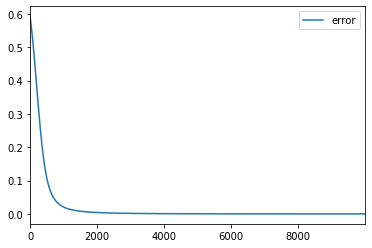

In [9]:
import pandas as pd
pd.DataFrame(errList, columns=['error']).plot()

# Block 2

#### Implement a neural network for XOR using Keras ( just consider it as a baseline model)

In [30]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(units=2,activation='relu',input_dim=2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
print(model.get_weights())
X = np.array(([0, 0], [0, 1], [1, 0], [1,1]), dtype=float)
y = np.array(([0], [1], [1], [0]), dtype=float)
history = model.fit(x,y,epochs=5000,batch_size=4)
print(model.get_weights())




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
[array([[-0.49816293,  1.074726  ],
       [ 0.98215854,  0.64125144]], dtype=float32), array([0., 0.], dtype=float32), array([[ 0.73762286],
       [-0.2718202 ]], dtype=float32), array([0.], dtype=float32)]
Epoch 1/5000
4/4 [==============================] - 0s 20ms/step - loss: 0.6596 - accuracy: 0.7500
Epoch 2/5000
4/4 [==============================] - 0s 493us/step - loss: 0.6594 - accuracy: 0.7500
Epoch 3/5000
4/4 [==============================] - 0s 374us/step - loss: 0.6592 - accuracy: 0.7500
Epoch 4/5

Epoch 75/5000
4/4 [==============================] - 0s 907us/step - loss: 0.6436 - accuracy: 0.7500
Epoch 76/5000
4/4 [==============================] - 0s 471us/step - loss: 0.6434 - accuracy: 0.7500
Epoch 77/5000
4/4 [==============================] - 0s 566us/step - loss: 0.6431 - accuracy: 0.7500
Epoch 78/5000
4/4 [==============================] - 0s 569us/step - loss: 0.6429 - accuracy: 0.7500
Epoch 79/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7500
Epoch 80/5000
4/4 [==============================] - 0s 500us/step - loss: 0.6425 - accuracy: 0.7500
Epoch 81/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7500
Epoch 82/5000
4/4 [==============================] - 0s 367us/step - loss: 0.6421 - accuracy: 0.7500
Epoch 83/5000
4/4 [==============================] - 0s 554us/step - loss: 0.6419 - accuracy: 0.7500
Epoch 84/5000
4/4 [==============================] - 0s 931us/step - loss: 0.6416 - accuracy: 0

Epoch 156/5000
4/4 [==============================] - 0s 404us/step - loss: 0.6259 - accuracy: 0.7500
Epoch 157/5000
4/4 [==============================] - 0s 570us/step - loss: 0.6257 - accuracy: 0.7500
Epoch 158/5000
4/4 [==============================] - 0s 849us/step - loss: 0.6255 - accuracy: 0.7500
Epoch 159/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.7500
Epoch 160/5000
4/4 [==============================] - 0s 497us/step - loss: 0.6251 - accuracy: 0.7500
Epoch 161/5000
4/4 [==============================] - 0s 470us/step - loss: 0.6248 - accuracy: 0.7500
Epoch 162/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.7500
Epoch 163/5000
4/4 [==============================] - 0s 496us/step - loss: 0.6244 - accuracy: 0.7500
Epoch 164/5000
4/4 [==============================] - 0s 445us/step - loss: 0.6242 - accuracy: 0.7500
Epoch 165/5000
4/4 [==============================] - 0s 410us/step - loss: 0.6239 - a

Epoch 237/5000
4/4 [==============================] - 0s 382us/step - loss: 0.6098 - accuracy: 0.7500
Epoch 238/5000
4/4 [==============================] - 0s 476us/step - loss: 0.6095 - accuracy: 0.7500
Epoch 239/5000
4/4 [==============================] - 0s 522us/step - loss: 0.6093 - accuracy: 0.7500
Epoch 240/5000
4/4 [==============================] - 0s 438us/step - loss: 0.6091 - accuracy: 0.7500
Epoch 241/5000
4/4 [==============================] - 0s 437us/step - loss: 0.6089 - accuracy: 0.7500
Epoch 242/5000
4/4 [==============================] - 0s 410us/step - loss: 0.6087 - accuracy: 0.7500
Epoch 243/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.7500
Epoch 244/5000
4/4 [==============================] - 0s 485us/step - loss: 0.6083 - accuracy: 0.7500
Epoch 245/5000
4/4 [==============================] - 0s 375us/step - loss: 0.6081 - accuracy: 0.7500
Epoch 246/5000
4/4 [==============================] - 0s 342us/step - loss: 0.6078 -

Epoch 318/5000
4/4 [==============================] - 0s 539us/step - loss: 0.5889 - accuracy: 0.7500
Epoch 319/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7500
Epoch 320/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7500
Epoch 321/5000
4/4 [==============================] - 0s 428us/step - loss: 0.5880 - accuracy: 0.7500
Epoch 322/5000
4/4 [==============================] - 0s 565us/step - loss: 0.5877 - accuracy: 0.7500
Epoch 323/5000
4/4 [==============================] - 0s 566us/step - loss: 0.5874 - accuracy: 0.7500
Epoch 324/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.7500
Epoch 325/5000
4/4 [==============================] - 0s 538us/step - loss: 0.5867 - accuracy: 0.7500
Epoch 326/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7500
Epoch 327/5000
4/4 [==============================] - 0s 522us/step - loss: 0.5860 - accur

Epoch 399/5000
4/4 [==============================] - 0s 305us/step - loss: 0.5590 - accuracy: 0.7500
Epoch 400/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7500
Epoch 401/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7500
Epoch 402/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7500
Epoch 403/5000
4/4 [==============================] - 0s 690us/step - loss: 0.5573 - accuracy: 0.7500
Epoch 404/5000
4/4 [==============================] - 0s 427us/step - loss: 0.5569 - accuracy: 0.7500
Epoch 405/5000
4/4 [==============================] - 0s 555us/step - loss: 0.5564 - accuracy: 0.7500
Epoch 406/5000
4/4 [==============================] - 0s 952us/step - loss: 0.5560 - accuracy: 0.7500
Epoch 407/5000
4/4 [==============================] - 0s 301us/step - loss: 0.5556 - accuracy: 0.7500
Epoch 408/5000
4/4 [==============================] - 0s 373us/step - loss: 0.5551 - acc

Epoch 480/5000
4/4 [==============================] - 0s 525us/step - loss: 0.5306 - accuracy: 0.7500
Epoch 481/5000
4/4 [==============================] - 0s 411us/step - loss: 0.5303 - accuracy: 0.7500
Epoch 482/5000
4/4 [==============================] - 0s 606us/step - loss: 0.5300 - accuracy: 0.7500
Epoch 483/5000
4/4 [==============================] - 0s 408us/step - loss: 0.5297 - accuracy: 0.7500
Epoch 484/5000
4/4 [==============================] - 0s 712us/step - loss: 0.5294 - accuracy: 0.7500
Epoch 485/5000
4/4 [==============================] - 0s 391us/step - loss: 0.5291 - accuracy: 0.7500
Epoch 486/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.7500
Epoch 487/5000
4/4 [==============================] - 0s 476us/step - loss: 0.5285 - accuracy: 0.7500
Epoch 488/5000
4/4 [==============================] - 0s 467us/step - loss: 0.5283 - accuracy: 0.7500
Epoch 489/5000
4/4 [==============================] - 0s 639us/step - loss: 0.5280 -

Epoch 561/5000
4/4 [==============================] - 0s 409us/step - loss: 0.5085 - accuracy: 0.7500
Epoch 562/5000
4/4 [==============================] - 0s 432us/step - loss: 0.5082 - accuracy: 0.7500
Epoch 563/5000
4/4 [==============================] - 0s 858us/step - loss: 0.5080 - accuracy: 0.7500
Epoch 564/5000
4/4 [==============================] - 0s 434us/step - loss: 0.5077 - accuracy: 0.7500
Epoch 565/5000
4/4 [==============================] - 0s 351us/step - loss: 0.5074 - accuracy: 0.7500
Epoch 566/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.7500
Epoch 567/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7500
Epoch 568/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7500
Epoch 569/5000
4/4 [==============================] - 0s 553us/step - loss: 0.5064 - accuracy: 0.7500
Epoch 570/5000
4/4 [==============================] - 0s 421us/step - loss: 0.5062 - acc

Epoch 642/5000
4/4 [==============================] - 0s 350us/step - loss: 0.4890 - accuracy: 0.7500
Epoch 643/5000
4/4 [==============================] - 0s 679us/step - loss: 0.4888 - accuracy: 0.7500
Epoch 644/5000
4/4 [==============================] - 0s 567us/step - loss: 0.4886 - accuracy: 0.7500
Epoch 645/5000
4/4 [==============================] - 0s 548us/step - loss: 0.4883 - accuracy: 0.7500
Epoch 646/5000
4/4 [==============================] - 0s 716us/step - loss: 0.4881 - accuracy: 0.7500
Epoch 647/5000
4/4 [==============================] - 0s 619us/step - loss: 0.4879 - accuracy: 0.7500
Epoch 648/5000
4/4 [==============================] - 0s 383us/step - loss: 0.4877 - accuracy: 0.7500
Epoch 649/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7500
Epoch 650/5000
4/4 [==============================] - 0s 469us/step - loss: 0.4872 - accuracy: 0.7500
Epoch 651/5000
4/4 [==============================] - 0s 611us/step - loss: 0.4870 -

Epoch 723/5000
4/4 [==============================] - 0s 810us/step - loss: 0.4717 - accuracy: 0.7500
Epoch 724/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7500
Epoch 725/5000
4/4 [==============================] - 0s 370us/step - loss: 0.4713 - accuracy: 0.7500
Epoch 726/5000
4/4 [==============================] - 0s 423us/step - loss: 0.4711 - accuracy: 0.7500
Epoch 727/5000
4/4 [==============================] - 0s 978us/step - loss: 0.4709 - accuracy: 0.7500
Epoch 728/5000
4/4 [==============================] - 0s 458us/step - loss: 0.4707 - accuracy: 0.7500
Epoch 729/5000
4/4 [==============================] - 0s 836us/step - loss: 0.4705 - accuracy: 0.7500
Epoch 730/5000
4/4 [==============================] - 0s 356us/step - loss: 0.4703 - accuracy: 0.7500
Epoch 731/5000
4/4 [==============================] - 0s 458us/step - loss: 0.4701 - accuracy: 0.7500
Epoch 732/5000
4/4 [==============================] - 0s 427us/step - loss: 0.4699 -

Epoch 804/5000
4/4 [==============================] - 0s 736us/step - loss: 0.4564 - accuracy: 0.7500
Epoch 805/5000
4/4 [==============================] - 0s 485us/step - loss: 0.4562 - accuracy: 0.7500
Epoch 806/5000
4/4 [==============================] - 0s 569us/step - loss: 0.4560 - accuracy: 0.7500
Epoch 807/5000
4/4 [==============================] - 0s 405us/step - loss: 0.4559 - accuracy: 0.7500
Epoch 808/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7500
Epoch 809/5000
4/4 [==============================] - 0s 546us/step - loss: 0.4555 - accuracy: 0.7500
Epoch 810/5000
4/4 [==============================] - 0s 586us/step - loss: 0.4553 - accuracy: 0.7500
Epoch 811/5000
4/4 [==============================] - 0s 404us/step - loss: 0.4552 - accuracy: 0.7500
Epoch 812/5000
4/4 [==============================] - 0s 774us/step - loss: 0.4550 - accuracy: 0.7500
Epoch 813/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4548 - a

Epoch 885/5000
4/4 [==============================] - 0s 413us/step - loss: 0.4429 - accuracy: 0.7500
Epoch 886/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7500
Epoch 887/5000
4/4 [==============================] - 0s 462us/step - loss: 0.4426 - accuracy: 0.7500
Epoch 888/5000
4/4 [==============================] - 0s 591us/step - loss: 0.4425 - accuracy: 0.7500
Epoch 889/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7500
Epoch 890/5000
4/4 [==============================] - 0s 325us/step - loss: 0.4422 - accuracy: 0.7500
Epoch 891/5000
4/4 [==============================] - 0s 446us/step - loss: 0.4420 - accuracy: 0.7500
Epoch 892/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7500
Epoch 893/5000
4/4 [==============================] - 0s 613us/step - loss: 0.4417 - accuracy: 0.7500
Epoch 894/5000
4/4 [==============================] - 0s 346us/step - loss: 0.4416 - acc

Epoch 966/5000
4/4 [==============================] - 0s 371us/step - loss: 0.4313 - accuracy: 0.7500
Epoch 967/5000
4/4 [==============================] - 0s 384us/step - loss: 0.4311 - accuracy: 0.7500
Epoch 968/5000
4/4 [==============================] - 0s 905us/step - loss: 0.4310 - accuracy: 0.7500
Epoch 969/5000
4/4 [==============================] - 0s 400us/step - loss: 0.4309 - accuracy: 0.7500
Epoch 970/5000
4/4 [==============================] - 0s 729us/step - loss: 0.4307 - accuracy: 0.7500
Epoch 971/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7500
Epoch 972/5000
4/4 [==============================] - 0s 643us/step - loss: 0.4305 - accuracy: 0.7500
Epoch 973/5000
4/4 [==============================] - 0s 631us/step - loss: 0.4303 - accuracy: 0.7500
Epoch 974/5000
4/4 [==============================] - 0s 415us/step - loss: 0.4302 - accuracy: 0.7500
Epoch 975/5000
4/4 [==============================] - 0s 790us/step - loss: 0.4301 -

Epoch 1047/5000
4/4 [==============================] - 0s 843us/step - loss: 0.4211 - accuracy: 0.7500
Epoch 1048/5000
4/4 [==============================] - 0s 993us/step - loss: 0.4210 - accuracy: 0.7500
Epoch 1049/5000
4/4 [==============================] - 0s 373us/step - loss: 0.4209 - accuracy: 0.7500
Epoch 1050/5000
4/4 [==============================] - 0s 407us/step - loss: 0.4208 - accuracy: 0.7500
Epoch 1051/5000
4/4 [==============================] - 0s 443us/step - loss: 0.4207 - accuracy: 0.7500
Epoch 1052/5000
4/4 [==============================] - 0s 867us/step - loss: 0.4205 - accuracy: 0.7500
Epoch 1053/5000
4/4 [==============================] - 0s 439us/step - loss: 0.4204 - accuracy: 0.7500
Epoch 1054/5000
4/4 [==============================] - 0s 567us/step - loss: 0.4203 - accuracy: 0.7500
Epoch 1055/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.7500
Epoch 1056/5000
4/4 [==============================] - 0s 882us/step - loss

Epoch 1127/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.7500
Epoch 1128/5000
4/4 [==============================] - 0s 368us/step - loss: 0.4123 - accuracy: 0.7500
Epoch 1129/5000
4/4 [==============================] - 0s 373us/step - loss: 0.4122 - accuracy: 0.7500
Epoch 1130/5000
4/4 [==============================] - 0s 736us/step - loss: 0.4121 - accuracy: 0.7500
Epoch 1131/5000
4/4 [==============================] - 0s 413us/step - loss: 0.4120 - accuracy: 0.7500
Epoch 1132/5000
4/4 [==============================] - 0s 346us/step - loss: 0.4119 - accuracy: 0.7500
Epoch 1133/5000
4/4 [==============================] - 0s 469us/step - loss: 0.4118 - accuracy: 0.7500
Epoch 1134/5000
4/4 [==============================] - 0s 380us/step - loss: 0.4117 - accuracy: 0.7500
Epoch 1135/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.7500
Epoch 1136/5000
4/4 [==============================] - 0s 677us/step - loss: 

Epoch 1207/5000
4/4 [==============================] - 0s 533us/step - loss: 0.4049 - accuracy: 0.7500
Epoch 1208/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.7500
Epoch 1209/5000
4/4 [==============================] - 0s 429us/step - loss: 0.4047 - accuracy: 0.7500
Epoch 1210/5000
4/4 [==============================] - 0s 545us/step - loss: 0.4047 - accuracy: 0.7500
Epoch 1211/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.7500
Epoch 1212/5000
4/4 [==============================] - 0s 423us/step - loss: 0.4045 - accuracy: 0.7500
Epoch 1213/5000
4/4 [==============================] - 0s 453us/step - loss: 0.4044 - accuracy: 0.7500
Epoch 1214/5000
4/4 [==============================] - 0s 524us/step - loss: 0.4043 - accuracy: 0.7500
Epoch 1215/5000
4/4 [==============================] - 0s 398us/step - loss: 0.4042 - accuracy: 0.7500
Epoch 1216/5000
4/4 [==============================] - 0s 412us/step - loss: 

Epoch 1287/5000
4/4 [==============================] - 0s 439us/step - loss: 0.3984 - accuracy: 0.7500
Epoch 1288/5000
4/4 [==============================] - 0s 354us/step - loss: 0.3983 - accuracy: 0.7500
Epoch 1289/5000
4/4 [==============================] - 0s 381us/step - loss: 0.3982 - accuracy: 0.7500
Epoch 1290/5000
4/4 [==============================] - 0s 551us/step - loss: 0.3981 - accuracy: 0.7500
Epoch 1291/5000
4/4 [==============================] - 0s 911us/step - loss: 0.3981 - accuracy: 0.7500
Epoch 1292/5000
4/4 [==============================] - 0s 369us/step - loss: 0.3980 - accuracy: 0.7500
Epoch 1293/5000
4/4 [==============================] - 0s 405us/step - loss: 0.3979 - accuracy: 0.7500
Epoch 1294/5000
4/4 [==============================] - 0s 333us/step - loss: 0.3978 - accuracy: 0.7500
Epoch 1295/5000
4/4 [==============================] - 0s 340us/step - loss: 0.3978 - accuracy: 0.7500
Epoch 1296/5000
4/4 [==============================] - 0s 286us/step - lo

Epoch 1367/5000
4/4 [==============================] - 0s 379us/step - loss: 0.3927 - accuracy: 0.7500
Epoch 1368/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.7500
Epoch 1369/5000
4/4 [==============================] - 0s 281us/step - loss: 0.3926 - accuracy: 0.7500
Epoch 1370/5000
4/4 [==============================] - 0s 617us/step - loss: 0.3925 - accuracy: 0.7500
Epoch 1371/5000
4/4 [==============================] - 0s 818us/step - loss: 0.3925 - accuracy: 0.7500
Epoch 1372/5000
4/4 [==============================] - 0s 397us/step - loss: 0.3924 - accuracy: 0.7500
Epoch 1373/5000
4/4 [==============================] - 0s 775us/step - loss: 0.3923 - accuracy: 0.7500
Epoch 1374/5000
4/4 [==============================] - 0s 409us/step - loss: 0.3923 - accuracy: 0.7500
Epoch 1375/5000
4/4 [==============================] - 0s 444us/step - loss: 0.3922 - accuracy: 0.7500
Epoch 1376/5000
4/4 [==============================] - 0s 385us/step - loss

Epoch 1447/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.7500
Epoch 1448/5000
4/4 [==============================] - 0s 437us/step - loss: 0.3878 - accuracy: 0.7500
Epoch 1449/5000
4/4 [==============================] - 0s 544us/step - loss: 0.3877 - accuracy: 0.7500
Epoch 1450/5000
4/4 [==============================] - 0s 552us/step - loss: 0.3877 - accuracy: 0.7500
Epoch 1451/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.7500
Epoch 1452/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.7500
Epoch 1453/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.7500
Epoch 1454/5000
4/4 [==============================] - 0s 436us/step - loss: 0.3874 - accuracy: 0.7500
Epoch 1455/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.7500
Epoch 1456/5000
4/4 [==============================] - 0s 560us/step - loss: 0.3873

Epoch 1527/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.7500
Epoch 1528/5000
4/4 [==============================] - 0s 528us/step - loss: 0.3835 - accuracy: 0.7500
Epoch 1529/5000
4/4 [==============================] - 0s 518us/step - loss: 0.3834 - accuracy: 0.7500
Epoch 1530/5000
4/4 [==============================] - 0s 391us/step - loss: 0.3834 - accuracy: 0.7500
Epoch 1531/5000
4/4 [==============================] - 0s 378us/step - loss: 0.3834 - accuracy: 0.7500
Epoch 1532/5000
4/4 [==============================] - 0s 370us/step - loss: 0.3833 - accuracy: 0.7500
Epoch 1533/5000
4/4 [==============================] - 0s 373us/step - loss: 0.3832 - accuracy: 0.7500
Epoch 1534/5000
4/4 [==============================] - 0s 686us/step - loss: 0.3832 - accuracy: 0.7500
Epoch 1535/5000
4/4 [==============================] - 0s 417us/step - loss: 0.3831 - accuracy: 0.7500
Epoch 1536/5000
4/4 [==============================] - 0s 916us/step - loss

Epoch 1607/5000
4/4 [==============================] - 0s 406us/step - loss: 0.3798 - accuracy: 0.7500
Epoch 1608/5000
4/4 [==============================] - 0s 383us/step - loss: 0.3798 - accuracy: 0.7500
Epoch 1609/5000
4/4 [==============================] - 0s 557us/step - loss: 0.3797 - accuracy: 0.7500
Epoch 1610/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.7500
Epoch 1611/5000
4/4 [==============================] - 0s 459us/step - loss: 0.3797 - accuracy: 0.7500
Epoch 1612/5000
4/4 [==============================] - 0s 453us/step - loss: 0.3796 - accuracy: 0.7500
Epoch 1613/5000
4/4 [==============================] - 0s 607us/step - loss: 0.3796 - accuracy: 0.7500
Epoch 1614/5000
4/4 [==============================] - 0s 386us/step - loss: 0.3795 - accuracy: 0.7500
Epoch 1615/5000
4/4 [==============================] - 0s 505us/step - loss: 0.3795 - accuracy: 0.7500
Epoch 1616/5000
4/4 [==============================] - 0s 466us/step - loss

Epoch 1687/5000
4/4 [==============================] - 0s 520us/step - loss: 0.3766 - accuracy: 0.7500
Epoch 1688/5000
4/4 [==============================] - 0s 443us/step - loss: 0.3765 - accuracy: 0.7500
Epoch 1689/5000
4/4 [==============================] - 0s 586us/step - loss: 0.3765 - accuracy: 0.7500
Epoch 1690/5000
4/4 [==============================] - 0s 486us/step - loss: 0.3764 - accuracy: 0.7500
Epoch 1691/5000
4/4 [==============================] - 0s 523us/step - loss: 0.3764 - accuracy: 0.7500
Epoch 1692/5000
4/4 [==============================] - 0s 362us/step - loss: 0.3764 - accuracy: 0.7500
Epoch 1693/5000
4/4 [==============================] - 0s 492us/step - loss: 0.3763 - accuracy: 0.7500
Epoch 1694/5000
4/4 [==============================] - 0s 486us/step - loss: 0.3763 - accuracy: 0.7500
Epoch 1695/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.7500
Epoch 1696/5000
4/4 [==============================] - 0s 513us/step - loss

Epoch 1767/5000
4/4 [==============================] - 0s 464us/step - loss: 0.3737 - accuracy: 0.7500
Epoch 1768/5000
4/4 [==============================] - 0s 992us/step - loss: 0.3737 - accuracy: 0.7500
Epoch 1769/5000
4/4 [==============================] - 0s 404us/step - loss: 0.3736 - accuracy: 0.7500
Epoch 1770/5000
4/4 [==============================] - 0s 423us/step - loss: 0.3736 - accuracy: 0.7500
Epoch 1771/5000
4/4 [==============================] - 0s 523us/step - loss: 0.3736 - accuracy: 0.7500
Epoch 1772/5000
4/4 [==============================] - 0s 452us/step - loss: 0.3735 - accuracy: 0.7500
Epoch 1773/5000
4/4 [==============================] - 0s 515us/step - loss: 0.3735 - accuracy: 0.7500
Epoch 1774/5000
4/4 [==============================] - 0s 983us/step - loss: 0.3735 - accuracy: 0.7500
Epoch 1775/5000
4/4 [==============================] - 0s 614us/step - loss: 0.3734 - accuracy: 0.7500
Epoch 1776/5000
4/4 [==============================] - 0s 437us/step - lo

Epoch 1847/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.7500
Epoch 1848/5000
4/4 [==============================] - 0s 439us/step - loss: 0.3711 - accuracy: 0.7500
Epoch 1849/5000
4/4 [==============================] - 0s 425us/step - loss: 0.3711 - accuracy: 0.7500
Epoch 1850/5000
4/4 [==============================] - 0s 361us/step - loss: 0.3711 - accuracy: 0.7500
Epoch 1851/5000
4/4 [==============================] - 0s 677us/step - loss: 0.3711 - accuracy: 0.7500
Epoch 1852/5000
4/4 [==============================] - 0s 453us/step - loss: 0.3710 - accuracy: 0.7500
Epoch 1853/5000
4/4 [==============================] - 0s 592us/step - loss: 0.3710 - accuracy: 0.7500
Epoch 1854/5000
4/4 [==============================] - 0s 378us/step - loss: 0.3710 - accuracy: 0.7500
Epoch 1855/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.7500
Epoch 1856/5000
4/4 [==============================] - 0s 428us/step - loss: 

Epoch 1927/5000
4/4 [==============================] - 0s 334us/step - loss: 0.3689 - accuracy: 0.7500
Epoch 1928/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.7500
Epoch 1929/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.7500
Epoch 1930/5000
4/4 [==============================] - 0s 378us/step - loss: 0.3688 - accuracy: 0.7500
Epoch 1931/5000
4/4 [==============================] - 0s 329us/step - loss: 0.3688 - accuracy: 0.7500
Epoch 1932/5000
4/4 [==============================] - 0s 386us/step - loss: 0.3688 - accuracy: 0.7500
Epoch 1933/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.7500
Epoch 1934/5000
4/4 [==============================] - 0s 425us/step - loss: 0.3687 - accuracy: 0.7500
Epoch 1935/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.7500
Epoch 1936/5000
4/4 [==============================] - 0s 613us/step - loss: 0.36

Epoch 2007/5000
4/4 [==============================] - 0s 444us/step - loss: 0.3670 - accuracy: 0.7500
Epoch 2008/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.7500
Epoch 2009/5000
4/4 [==============================] - 0s 547us/step - loss: 0.3669 - accuracy: 0.7500
Epoch 2010/5000
4/4 [==============================] - 0s 853us/step - loss: 0.3669 - accuracy: 0.7500
Epoch 2011/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.7500
Epoch 2012/5000
4/4 [==============================] - 0s 531us/step - loss: 0.3669 - accuracy: 0.7500
Epoch 2013/5000
4/4 [==============================] - 0s 579us/step - loss: 0.3668 - accuracy: 0.7500
Epoch 2014/5000
4/4 [==============================] - 0s 862us/step - loss: 0.3668 - accuracy: 0.7500
Epoch 2015/5000
4/4 [==============================] - 0s 435us/step - loss: 0.3668 - accuracy: 0.7500
Epoch 2016/5000
4/4 [==============================] - 0s 454us/step - loss: 

Epoch 2087/5000
4/4 [==============================] - 0s 636us/step - loss: 0.3652 - accuracy: 0.7500
Epoch 2088/5000
4/4 [==============================] - 0s 844us/step - loss: 0.3652 - accuracy: 0.7500
Epoch 2089/5000
4/4 [==============================] - 0s 719us/step - loss: 0.3652 - accuracy: 0.7500
Epoch 2090/5000
4/4 [==============================] - 0s 563us/step - loss: 0.3651 - accuracy: 0.7500
Epoch 2091/5000
4/4 [==============================] - 0s 820us/step - loss: 0.3651 - accuracy: 0.7500
Epoch 2092/5000
4/4 [==============================] - 0s 468us/step - loss: 0.3651 - accuracy: 0.7500
Epoch 2093/5000
4/4 [==============================] - 0s 523us/step - loss: 0.3651 - accuracy: 0.7500
Epoch 2094/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.7500
Epoch 2095/5000
4/4 [==============================] - 0s 564us/step - loss: 0.3650 - accuracy: 0.7500
Epoch 2096/5000
4/4 [==============================] - 0s 1ms/step - loss: 

Epoch 2167/5000
4/4 [==============================] - 0s 475us/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2168/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2169/5000
4/4 [==============================] - 0s 530us/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2170/5000
4/4 [==============================] - 0s 396us/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2171/5000
4/4 [==============================] - 0s 330us/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2172/5000
4/4 [==============================] - 0s 530us/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2173/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.7500
Epoch 2174/5000
4/4 [==============================] - 0s 987us/step - loss: 0.3635 - accuracy: 0.7500
Epoch 2175/5000
4/4 [==============================] - 0s 464us/step - loss: 0.3635 - accuracy: 0.7500
Epoch 2176/5000
4/4 [==============================] - 0s 454us/step - loss: 

Epoch 2247/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2248/5000
4/4 [==============================] - 0s 501us/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2249/5000
4/4 [==============================] - 0s 479us/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2250/5000
4/4 [==============================] - 0s 530us/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2251/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2252/5000
4/4 [==============================] - 0s 381us/step - loss: 0.3622 - accuracy: 0.7500
Epoch 2253/5000
4/4 [==============================] - 0s 703us/step - loss: 0.3621 - accuracy: 0.7500
Epoch 2254/5000
4/4 [==============================] - 0s 495us/step - loss: 0.3621 - accuracy: 0.7500
Epoch 2255/5000
4/4 [==============================] - 0s 666us/step - loss: 0.3621 - accuracy: 0.7500
Epoch 2256/5000
4/4 [==============================] - 0s 490us/step - loss: 

Epoch 2327/5000
4/4 [==============================] - 0s 565us/step - loss: 0.3610 - accuracy: 0.7500
Epoch 2328/5000
4/4 [==============================] - 0s 611us/step - loss: 0.3610 - accuracy: 0.7500
Epoch 2329/5000
4/4 [==============================] - 0s 747us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2330/5000
4/4 [==============================] - 0s 479us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2331/5000
4/4 [==============================] - 0s 514us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2332/5000
4/4 [==============================] - 0s 644us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2333/5000
4/4 [==============================] - 0s 568us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2334/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2335/5000
4/4 [==============================] - 0s 911us/step - loss: 0.3609 - accuracy: 0.7500
Epoch 2336/5000
4/4 [==============================] - 0s 624us/step - loss

Epoch 2407/5000
4/4 [==============================] - 0s 502us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2408/5000
4/4 [==============================] - 0s 532us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2409/5000
4/4 [==============================] - 0s 636us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2410/5000
4/4 [==============================] - 0s 939us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2411/5000
4/4 [==============================] - 0s 317us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2412/5000
4/4 [==============================] - 0s 569us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2413/5000
4/4 [==============================] - 0s 338us/step - loss: 0.3597 - accuracy: 0.7500
Epoch 2414/5000
4/4 [==============================] - 0s 582us/step - loss: 0.3598 - accuracy: 0.7500
Epoch 2415/5000
4/4 [==============================] - 0s 349us/step - loss: 0.3597 - accuracy: 0.7500
Epoch 2416/5000
4/4 [==============================] - 0s 599us/step - lo

Epoch 2487/5000
4/4 [==============================] - 0s 414us/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2488/5000
4/4 [==============================] - 0s 460us/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2489/5000
4/4 [==============================] - 0s 513us/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2490/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2491/5000
4/4 [==============================] - 0s 561us/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2492/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.7500
Epoch 2493/5000
4/4 [==============================] - 0s 669us/step - loss: 0.3587 - accuracy: 0.7500
Epoch 2494/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.7500
Epoch 2495/5000
4/4 [==============================] - 0s 612us/step - loss: 0.3587 - accuracy: 0.7500
Epoch 2496/5000
4/4 [==============================] - 0s 453us/step - loss: 0.

Epoch 2568/5000
4/4 [==============================] - 0s 389us/step - loss: 0.3579 - accuracy: 0.7500
Epoch 2569/5000
4/4 [==============================] - 0s 352us/step - loss: 0.3579 - accuracy: 0.7500
Epoch 2570/5000
4/4 [==============================] - 0s 545us/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2571/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2572/5000
4/4 [==============================] - 0s 346us/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2573/5000
4/4 [==============================] - 0s 399us/step - loss: 0.3579 - accuracy: 0.5000
Epoch 2574/5000
4/4 [==============================] - 0s 440us/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2575/5000
4/4 [==============================] - 0s 382us/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2576/5000
4/4 [==============================] - 0s 494us/step - loss: 0.3578 - accuracy: 0.7500
Epoch 2577/5000
4/4 [==============================] - 0s 461us/step - loss

Epoch 2648/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.7500
Epoch 2649/5000
4/4 [==============================] - 0s 455us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2650/5000
4/4 [==============================] - 0s 524us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2651/5000
4/4 [==============================] - 0s 823us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2652/5000
4/4 [==============================] - 0s 592us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2653/5000
4/4 [==============================] - 0s 474us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2654/5000
4/4 [==============================] - 0s 449us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2655/5000
4/4 [==============================] - 0s 536us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2656/5000
4/4 [==============================] - 0s 878us/step - loss: 0.3570 - accuracy: 0.7500
Epoch 2657/5000
4/4 [==============================] - 0s 342us/step - loss

Epoch 2728/5000
4/4 [==============================] - 0s 553us/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2729/5000
4/4 [==============================] - 0s 767us/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2730/5000
4/4 [==============================] - 0s 662us/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2731/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2732/5000
4/4 [==============================] - 0s 904us/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2733/5000
4/4 [==============================] - 0s 785us/step - loss: 0.3563 - accuracy: 0.7500
Epoch 2734/5000
4/4 [==============================] - 0s 661us/step - loss: 0.3562 - accuracy: 0.7500
Epoch 2735/5000
4/4 [==============================] - 0s 724us/step - loss: 0.3562 - accuracy: 0.7500
Epoch 2736/5000
4/4 [==============================] - 0s 464us/step - loss: 0.3562 - accuracy: 0.7500
Epoch 2737/5000
4/4 [==============================] - 0s 1ms/step - loss: 

Epoch 2808/5000
4/4 [==============================] - 0s 277us/step - loss: 0.3556 - accuracy: 0.7500
Epoch 2809/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.7500
Epoch 2810/5000
4/4 [==============================] - 0s 603us/step - loss: 0.3556 - accuracy: 0.7500
Epoch 2811/5000
4/4 [==============================] - 0s 266us/step - loss: 0.3556 - accuracy: 0.7500
Epoch 2812/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.7500
Epoch 2813/5000
4/4 [==============================] - 0s 418us/step - loss: 0.3556 - accuracy: 0.7500
Epoch 2814/5000
4/4 [==============================] - 0s 419us/step - loss: 0.3555 - accuracy: 0.7500
Epoch 2815/5000
4/4 [==============================] - 0s 350us/step - loss: 0.3555 - accuracy: 0.7500
Epoch 2816/5000
4/4 [==============================] - 0s 393us/step - loss: 0.3555 - accuracy: 0.7500
Epoch 2817/5000
4/4 [==============================] - 0s 383us/step - loss: 

Epoch 2888/5000
4/4 [==============================] - 0s 400us/step - loss: 0.3550 - accuracy: 0.7500
Epoch 2889/5000
4/4 [==============================] - 0s 439us/step - loss: 0.3550 - accuracy: 0.7500
Epoch 2890/5000
4/4 [==============================] - 0s 844us/step - loss: 0.3550 - accuracy: 0.7500
Epoch 2891/5000
4/4 [==============================] - 0s 498us/step - loss: 0.3550 - accuracy: 0.7500
Epoch 2892/5000
4/4 [==============================] - 0s 563us/step - loss: 0.3550 - accuracy: 0.7500
Epoch 2893/5000
4/4 [==============================] - 0s 478us/step - loss: 0.3549 - accuracy: 0.7500
Epoch 2894/5000
4/4 [==============================] - 0s 350us/step - loss: 0.3549 - accuracy: 0.7500
Epoch 2895/5000
4/4 [==============================] - 0s 509us/step - loss: 0.3549 - accuracy: 0.7500
Epoch 2896/5000
4/4 [==============================] - 0s 414us/step - loss: 0.3549 - accuracy: 0.7500
Epoch 2897/5000
4/4 [==============================] - 0s 436us/step - lo

Epoch 2968/5000
4/4 [==============================] - 0s 872us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2969/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2970/5000
4/4 [==============================] - 0s 892us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2971/5000
4/4 [==============================] - 0s 850us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2972/5000
4/4 [==============================] - 0s 739us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2973/5000
4/4 [==============================] - 0s 549us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2974/5000
4/4 [==============================] - 0s 660us/step - loss: 0.3544 - accuracy: 0.7500
Epoch 2975/5000
4/4 [==============================] - 0s 441us/step - loss: 0.3543 - accuracy: 0.7500
Epoch 2976/5000
4/4 [==============================] - 0s 581us/step - loss: 0.3543 - accuracy: 0.7500
Epoch 2977/5000
4/4 [==============================] - 0s 421us/step - loss

Epoch 3048/5000
4/4 [==============================] - 0s 733us/step - loss: 0.3539 - accuracy: 0.7500
Epoch 3049/5000
4/4 [==============================] - 0s 514us/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3050/5000
4/4 [==============================] - 0s 971us/step - loss: 0.3539 - accuracy: 0.5000
Epoch 3051/5000
4/4 [==============================] - 0s 448us/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3052/5000
4/4 [==============================] - 0s 534us/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3053/5000
4/4 [==============================] - 0s 486us/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3054/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3055/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3056/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7500
Epoch 3057/5000
4/4 [==============================] - 0s 838us/step - loss: 0.

Epoch 3128/5000
4/4 [==============================] - 0s 558us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3129/5000
4/4 [==============================] - 0s 900us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3130/5000
4/4 [==============================] - 0s 416us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3131/5000
4/4 [==============================] - 0s 374us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3132/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3133/5000
4/4 [==============================] - 0s 936us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3134/5000
4/4 [==============================] - 0s 946us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3135/5000
4/4 [==============================] - 0s 581us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3136/5000
4/4 [==============================] - 0s 772us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 3137/5000
4/4 [==============================] - 0s 1ms/step - loss: 

Epoch 3208/5000
4/4 [==============================] - 0s 450us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3209/5000
4/4 [==============================] - 0s 495us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3210/5000
4/4 [==============================] - 0s 498us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3211/5000
4/4 [==============================] - 0s 378us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3212/5000
4/4 [==============================] - 0s 384us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3213/5000
4/4 [==============================] - 0s 367us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3214/5000
4/4 [==============================] - 0s 343us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3215/5000
4/4 [==============================] - 0s 441us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3216/5000
4/4 [==============================] - 0s 418us/step - loss: 0.3529 - accuracy: 0.7500
Epoch 3217/5000
4/4 [==============================] - 0s 441us/step - lo

Epoch 3288/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3289/5000
4/4 [==============================] - 0s 474us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3290/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3291/5000
4/4 [==============================] - 0s 368us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3292/5000
4/4 [==============================] - 0s 618us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3293/5000
4/4 [==============================] - 0s 502us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3294/5000
4/4 [==============================] - 0s 440us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3295/5000
4/4 [==============================] - 0s 426us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3296/5000
4/4 [==============================] - 0s 475us/step - loss: 0.3525 - accuracy: 0.7500
Epoch 3297/5000
4/4 [==============================] - 0s 495us/step - loss: 

Epoch 3368/5000
4/4 [==============================] - 0s 602us/step - loss: 0.3522 - accuracy: 0.7500
Epoch 3369/5000
4/4 [==============================] - 0s 501us/step - loss: 0.3522 - accuracy: 0.7500
Epoch 3370/5000
4/4 [==============================] - 0s 578us/step - loss: 0.3522 - accuracy: 0.7500
Epoch 3371/5000
4/4 [==============================] - 0s 547us/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3372/5000
4/4 [==============================] - 0s 570us/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3373/5000
4/4 [==============================] - 0s 491us/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3374/5000
4/4 [==============================] - 0s 430us/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3375/5000
4/4 [==============================] - 0s 907us/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3376/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.7500
Epoch 3377/5000
4/4 [==============================] - 0s 463us/step - loss

Epoch 3448/5000
4/4 [==============================] - 0s 527us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3449/5000
4/4 [==============================] - 0s 773us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3450/5000
4/4 [==============================] - 0s 386us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3451/5000
4/4 [==============================] - 0s 466us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3452/5000
4/4 [==============================] - 0s 648us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3453/5000
4/4 [==============================] - 0s 956us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3454/5000
4/4 [==============================] - 0s 418us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3455/5000
4/4 [==============================] - 0s 994us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3456/5000
4/4 [==============================] - 0s 379us/step - loss: 0.3518 - accuracy: 0.7500
Epoch 3457/5000
4/4 [==============================] - 0s 871us/step - lo

Epoch 3528/5000
4/4 [==============================] - 0s 394us/step - loss: 0.3515 - accuracy: 0.7500
Epoch 3529/5000
4/4 [==============================] - 0s 412us/step - loss: 0.3515 - accuracy: 0.7500
Epoch 3530/5000
4/4 [==============================] - 0s 413us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3531/5000
4/4 [==============================] - 0s 308us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3532/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3533/5000
4/4 [==============================] - 0s 441us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3534/5000
4/4 [==============================] - 0s 448us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3535/5000
4/4 [==============================] - 0s 748us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3536/5000
4/4 [==============================] - 0s 793us/step - loss: 0.3514 - accuracy: 0.7500
Epoch 3537/5000
4/4 [==============================] - 0s 604us/step - loss

Epoch 3608/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.7500
Epoch 3609/5000
4/4 [==============================] - 0s 409us/step - loss: 0.3512 - accuracy: 0.7500
Epoch 3610/5000
4/4 [==============================] - 0s 602us/step - loss: 0.3512 - accuracy: 0.7500
Epoch 3611/5000
4/4 [==============================] - 0s 396us/step - loss: 0.3512 - accuracy: 0.7500
Epoch 3612/5000
4/4 [==============================] - 0s 331us/step - loss: 0.3512 - accuracy: 0.7500
Epoch 3613/5000
4/4 [==============================] - 0s 622us/step - loss: 0.3511 - accuracy: 0.7500
Epoch 3614/5000
4/4 [==============================] - 0s 954us/step - loss: 0.3511 - accuracy: 0.7500
Epoch 3615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.7500
Epoch 3616/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7500
Epoch 3617/5000
4/4 [==============================] - 0s 739us/step - loss: 0.

Epoch 3688/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3689/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3690/5000
4/4 [==============================] - 0s 372us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3691/5000
4/4 [==============================] - 0s 600us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3692/5000
4/4 [==============================] - 0s 431us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3693/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3694/5000
4/4 [==============================] - 0s 388us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3695/5000
4/4 [==============================] - 0s 419us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3696/5000
4/4 [==============================] - 0s 545us/step - loss: 0.3509 - accuracy: 0.7500
Epoch 3697/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.35

Epoch 3768/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.7500
Epoch 3769/5000
4/4 [==============================] - 0s 872us/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3770/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3771/5000
4/4 [==============================] - 0s 458us/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3772/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3773/5000
4/4 [==============================] - 0s 463us/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3774/5000
4/4 [==============================] - 0s 422us/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3775/5000
4/4 [==============================] - 0s 576us/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3776/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.7500
Epoch 3777/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3506

Epoch 3848/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3849/5000
4/4 [==============================] - 0s 732us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3850/5000
4/4 [==============================] - 0s 439us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3851/5000
4/4 [==============================] - 0s 528us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3852/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3853/5000
4/4 [==============================] - 0s 368us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3854/5000
4/4 [==============================] - 0s 463us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3855/5000
4/4 [==============================] - 0s 558us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3856/5000
4/4 [==============================] - 0s 713us/step - loss: 0.3504 - accuracy: 0.7500
Epoch 3857/5000
4/4 [==============================] - 0s 426us/step - loss: 

Epoch 3928/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3929/5000
4/4 [==============================] - 0s 592us/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3930/5000
4/4 [==============================] - 0s 643us/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3931/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3932/5000
4/4 [==============================] - 0s 506us/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3933/5000
4/4 [==============================] - 0s 437us/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3934/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3935/5000
4/4 [==============================] - 0s 396us/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3936/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.7500
Epoch 3937/5000
4/4 [==============================] - 0s 508us/step - loss: 0.35

Epoch 4008/5000
4/4 [==============================] - 0s 497us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4009/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4010/5000
4/4 [==============================] - 0s 375us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4011/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4012/5000
4/4 [==============================] - 0s 657us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4013/5000
4/4 [==============================] - 0s 519us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4014/5000
4/4 [==============================] - 0s 533us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4015/5000
4/4 [==============================] - 0s 517us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4016/5000
4/4 [==============================] - 0s 513us/step - loss: 0.3500 - accuracy: 0.7500
Epoch 4017/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.

Epoch 4088/5000
4/4 [==============================] - 0s 465us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4089/5000
4/4 [==============================] - 0s 546us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4090/5000
4/4 [==============================] - 0s 492us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4091/5000
4/4 [==============================] - 0s 508us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4092/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4093/5000
4/4 [==============================] - 0s 408us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4094/5000
4/4 [==============================] - 0s 609us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4095/5000
4/4 [==============================] - 0s 462us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4096/5000
4/4 [==============================] - 0s 540us/step - loss: 0.3498 - accuracy: 0.7500
Epoch 4097/5000
4/4 [==============================] - 0s 538us/step - loss

Epoch 4168/5000
4/4 [==============================] - 0s 859us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4169/5000
4/4 [==============================] - 0s 392us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4170/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4171/5000
4/4 [==============================] - 0s 901us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4172/5000
4/4 [==============================] - 0s 409us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4173/5000
4/4 [==============================] - 0s 601us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4174/5000
4/4 [==============================] - 0s 434us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4175/5000
4/4 [==============================] - 0s 410us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4176/5000
4/4 [==============================] - 0s 513us/step - loss: 0.3496 - accuracy: 0.7500
Epoch 4177/5000
4/4 [==============================] - 0s 527us/step - loss

Epoch 4248/5000
4/4 [==============================] - 0s 362us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4249/5000
4/4 [==============================] - 0s 871us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4250/5000
4/4 [==============================] - 0s 433us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4251/5000
4/4 [==============================] - 0s 414us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4252/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4253/5000
4/4 [==============================] - 0s 414us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4254/5000
4/4 [==============================] - 0s 503us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4255/5000
4/4 [==============================] - 0s 438us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4256/5000
4/4 [==============================] - 0s 447us/step - loss: 0.3494 - accuracy: 0.7500
Epoch 4257/5000
4/4 [==============================] - 0s 493us/step - loss

Epoch 4328/5000
4/4 [==============================] - 0s 385us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4329/5000
4/4 [==============================] - 0s 445us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4330/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4331/5000
4/4 [==============================] - 0s 535us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4332/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4333/5000
4/4 [==============================] - 0s 831us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4334/5000
4/4 [==============================] - 0s 404us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4335/5000
4/4 [==============================] - 0s 607us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4336/5000
4/4 [==============================] - 0s 458us/step - loss: 0.3493 - accuracy: 0.7500
Epoch 4337/5000
4/4 [==============================] - 0s 492us/step - loss: 

Epoch 4408/5000
4/4 [==============================] - 0s 735us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4409/5000
4/4 [==============================] - 0s 344us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4410/5000
4/4 [==============================] - 0s 587us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4411/5000
4/4 [==============================] - 0s 608us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4412/5000
4/4 [==============================] - 0s 444us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4413/5000
4/4 [==============================] - 0s 407us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4414/5000
4/4 [==============================] - 0s 501us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4415/5000
4/4 [==============================] - 0s 525us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4416/5000
4/4 [==============================] - 0s 585us/step - loss: 0.3491 - accuracy: 0.7500
Epoch 4417/5000
4/4 [==============================] - 0s 796us/step - lo

Epoch 4488/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4489/5000
4/4 [==============================] - 0s 593us/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4490/5000
4/4 [==============================] - 0s 469us/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4491/5000
4/4 [==============================] - 0s 527us/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4492/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4493/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4494/5000
4/4 [==============================] - 0s 433us/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4495/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4496/5000
4/4 [==============================] - 0s 453us/step - loss: 0.3490 - accuracy: 0.7500
Epoch 4497/5000
4/4 [==============================] - 0s 436us/step - loss: 0.34

Epoch 4568/5000
4/4 [==============================] - 0s 952us/step - loss: 0.3489 - accuracy: 0.7500
Epoch 4569/5000
4/4 [==============================] - 0s 555us/step - loss: 0.3489 - accuracy: 0.7500
Epoch 4570/5000
4/4 [==============================] - 0s 828us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4571/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4572/5000
4/4 [==============================] - 0s 451us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4573/5000
4/4 [==============================] - 0s 452us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4574/5000
4/4 [==============================] - 0s 522us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4575/5000
4/4 [==============================] - 0s 470us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4576/5000
4/4 [==============================] - 0s 518us/step - loss: 0.3488 - accuracy: 0.7500
Epoch 4577/5000
4/4 [==============================] - 0s 1ms/step - loss: 

Epoch 4648/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4649/5000
4/4 [==============================] - 0s 857us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4650/5000
4/4 [==============================] - 0s 291us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4651/5000
4/4 [==============================] - 0s 489us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4652/5000
4/4 [==============================] - 0s 541us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4653/5000
4/4 [==============================] - 0s 698us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4654/5000
4/4 [==============================] - 0s 672us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4655/5000
4/4 [==============================] - 0s 717us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4656/5000
4/4 [==============================] - 0s 911us/step - loss: 0.3487 - accuracy: 0.7500
Epoch 4657/5000
4/4 [==============================] - 0s 974us/step - loss

Epoch 4728/5000
4/4 [==============================] - 0s 641us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4729/5000
4/4 [==============================] - 0s 505us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4730/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4731/5000
4/4 [==============================] - 0s 390us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4732/5000
4/4 [==============================] - 0s 502us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4733/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4734/5000
4/4 [==============================] - 0s 487us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4735/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4736/5000
4/4 [==============================] - 0s 553us/step - loss: 0.3486 - accuracy: 0.7500
Epoch 4737/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.34

Epoch 4808/5000
4/4 [==============================] - 0s 864us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4809/5000
4/4 [==============================] - 0s 395us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4810/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4811/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4812/5000
4/4 [==============================] - 0s 392us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4813/5000
4/4 [==============================] - 0s 502us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4814/5000
4/4 [==============================] - 0s 400us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4815/5000
4/4 [==============================] - 0s 372us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4816/5000
4/4 [==============================] - 0s 356us/step - loss: 0.3485 - accuracy: 0.7500
Epoch 4817/5000
4/4 [==============================] - 0s 845us/step - loss: 

Epoch 4888/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4889/5000
4/4 [==============================] - 0s 878us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4890/5000
4/4 [==============================] - 0s 814us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4891/5000
4/4 [==============================] - 0s 516us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4892/5000
4/4 [==============================] - 0s 496us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4893/5000
4/4 [==============================] - 0s 577us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4894/5000
4/4 [==============================] - 0s 499us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4895/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.5000
Epoch 4896/5000
4/4 [==============================] - 0s 484us/step - loss: 0.3484 - accuracy: 0.7500
Epoch 4897/5000
4/4 [==============================] - 0s 486us/step - loss: 

Epoch 4968/5000
4/4 [==============================] - 0s 410us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4969/5000
4/4 [==============================] - 0s 650us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4970/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4971/5000
4/4 [==============================] - 0s 673us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4972/5000
4/4 [==============================] - 0s 715us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4973/5000
4/4 [==============================] - 0s 297us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4974/5000
4/4 [==============================] - 0s 509us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4975/5000
4/4 [==============================] - 0s 455us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4976/5000
4/4 [==============================] - 0s 426us/step - loss: 0.3483 - accuracy: 0.7500
Epoch 4977/5000
4/4 [==============================] - 0s 405us/step - loss

In [21]:
print(model.predict(x,batch_size=4))

[[0.0275134 ]
 [0.98264664]
 [0.9719131 ]
 [0.01738581]]




# Implement neural network for XOR along with backpropagation and loss curves 

### JUST USING NUMPY 

###### Find out what missing here in(( Forward and Backward propagation)) the below approach!! If you get, try to fix it. 



Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.50214323]
 [0.53536263]
 [0.4633951 ]
 [0.51344516]]
Loss: 
0.2549016151108521


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49879152]
 [0.52958142]
 [0.46162586]
 [0.50841237]]
Loss: 
0.2546041177355299


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49646854]
 [0.52540374]
 [0.46079791]
 [0.50498915]]
Loss: 
0.25436888813383074


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.4948594 ]
 [0.52234427]
 [0.4606107 ]
 [0.50267988]]
Loss: 
0.2541671753587765


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49374502]
 [0.52006394]
 [0.46085568]
 [0.50113941]]
Loss: 
0.2539850197341211


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actu

Predicted Output: 
[[0.46848846]
 [0.50265159]
 [0.56370732]
 [0.52751799]]
Loss: 
0.2338658536484931


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46789078]
 [0.50250116]
 [0.56494919]
 [0.52755609]]
Loss: 
0.2335028791255096


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46728566]
 [0.50234539]
 [0.56619972]
 [0.52758506]]
Loss: 
0.23313616997086173


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46667323]
 [0.5021844 ]
 [0.56745848]
 [0.52760486]]
Loss: 
0.2327658308378905


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46605364]
 [0.50201835]
 [0.56872499]
 [0.52761541]]
Loss: 
0.23239196809510462


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46542705]
 [0.50184739]
 

Predicted Output: 
[[0.35558105]
 [0.5620599 ]
 [0.66522629]
 [0.46828059]]
Loss: 
0.16239739019870109


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.35473001]
 [0.5634866 ]
 [0.66510384]
 [0.46747577]]
Loss: 
0.16176658997051088


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.35387795]
 [0.5649167 ]
 [0.66498852]
 [0.46665652]]
Loss: 
0.16113202073147787


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.35302498]
 [0.56634977]
 [0.66488113]
 [0.46582244]]
Loss: 
0.16049359160331064


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.35217118]
 [0.56778541]
 [0.66478244]
 [0.46497314]]
Loss: 
0.15985120710630868


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.35131665]
 [0.56922322

Loss: 
0.033378285551516285


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.20902482]
 [0.82136342]
 [0.82581561]
 [0.16325642]]
Loss: 
0.03314881577065784


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.20856317]
 [0.82202971]
 [0.82641935]
 [0.16243975]]
Loss: 
0.032922233695683055


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.2081045 ]
 [0.82268961]
 [0.82701786]
 [0.16163132]]
Loss: 
0.032698490533149285


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.2076488 ]
 [0.82334323]
 [0.8276112 ]
 [0.16083101]]
Loss: 
0.032477538436147646


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.20719604]
 [0.82399064]
 [0.82819942]
 [0.16003872]]
Loss: 
0.03225933048651638


Input: 
[[0.

Predicted Output: 
[[0.15600492]
 [0.88567226]
 [0.88642101]
 [0.0873374 ]]
Loss: 
0.0144840935306396


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.1558145 ]
 [0.88586484]
 [0.88660851]
 [0.08712321]]
Loss: 
0.01443826904310976


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.15562479]
 [0.88605648]
 [0.88679513]
 [0.08691018]]
Loss: 
0.014392731377490236


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.15543579]
 [0.88624718]
 [0.88698086]
 [0.08669831]]
Loss: 
0.014347477878090051


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.15524748]
 [0.88643695]
 [0.88716572]
 [0.08648758]]
Loss: 
0.014302505921420804


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.15505987]
 [0.886625

Predicted Output: 
[[0.12963972]
 [0.91036355]
 [0.91065303]
 [0.06097544]]
Loss: 
0.009135508480407898


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.12953118]
 [0.9104578 ]
 [0.91074614]
 [0.06087975]]
Loss: 
0.009117182303135725


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.12942292]
 [0.91055175]
 [0.91083896]
 [0.06078441]]
Loss: 
0.009098929285548169


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.12931493]
 [0.91064541]
 [0.9109315 ]
 [0.0606894 ]]
Loss: 
0.009080748990925888


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.12920722]
 [0.91073878]
 [0.91102376]
 [0.06059473]]
Loss: 
0.009062640986008775


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.12909977]
 [0.910

Predicted Output: 
[[0.11328157]
 [0.92399544]
 [0.92415556]
 [0.04761831]]
Loss: 
0.006657322386349186


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.11320933]
 [0.92405326]
 [0.92421296]
 [0.04756389]]
Loss: 
0.006647564842978525


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.11313723]
 [0.92411095]
 [0.92427023]
 [0.04750961]]
Loss: 
0.006637835751850666


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.11306528]
 [0.9241685 ]
 [0.92432737]
 [0.04745547]]
Loss: 
0.006628134988665378


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.11299345]
 [0.92422593]
 [0.92438439]
 [0.04740147]]
Loss: 
0.00661846242984537


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.11292177]
 [0.9242

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.10221036]
 [0.93264154]
 [0.93274881]
 [0.03971336]]
Loss: 
0.00527099833761785


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.10215734]
 [0.93268195]
 [0.93278901]
 [0.03967757]]
Loss: 
0.005264867050377826


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.10210441]
 [0.93272229]
 [0.93282915]
 [0.03964184]]
Loss: 
0.005258749939143378


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.10205156]
 [0.93276256]
 [0.93286921]
 [0.03960619]]
Loss: 
0.005252646954801563


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.10199879]
 [0.93280276]
 [0.9329092 ]
 [0.03957062]]
Loss: 
0.005246558048466153


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1

Loss: 
0.004319268463129076


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.09341296]
 [0.93922951]
 [0.93930745]
 [0.03402859]]
Loss: 
0.004315141461005994


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0933725 ]
 [0.93925928]
 [0.93933711]
 [0.0340036 ]]
Loss: 
0.004311022290353635


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.09333208]
 [0.93928902]
 [0.93936673]
 [0.03397866]]
Loss: 
0.0043069109289099305


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.09329172]
 [0.93931871]
 [0.93939631]
 [0.03395376]]
Loss: 
0.004302807354497153


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.09325141]
 [0.93934836]
 [0.93942584]
 [0.0339289 ]]
Loss: 
0.004298711545021507


Input: 
[

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08691198]
 [0.94395622]
 [0.94401767]
 [0.0301461 ]]
Loss: 
0.003684351183952956


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08687938]
 [0.94397964]
 [0.94404102]
 [0.03012729]]
Loss: 
0.0036813417642647525


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08684681]
 [0.94400304]
 [0.94406434]
 [0.0301085 ]]
Loss: 
0.003678337223606859


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08681429]
 [0.9440264 ]
 [0.94408763]
 [0.03008975]]
Loss: 
0.00367533755013397


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0867818 ]
 [0.94404973]
 [0.94411089]
 [0.03007102]]
Loss: 
0.003672342732039083


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 

Predicted Output: 
[[0.08179171]
 [0.94760248]
 [0.94765334]
 [0.02726971]]
Loss: 
0.0032297987624375158


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08176453]
 [0.94762166]
 [0.94767247]
 [0.02725486]]
Loss: 
0.0032274815895352487


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08173738]
 [0.94764083]
 [0.94769159]
 [0.02724002]]
Loss: 
0.003225167714965251


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08171025]
 [0.94765997]
 [0.94771068]
 [0.02722521]]
Loss: 
0.00322285713169911


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08168315]
 [0.9476791 ]
 [0.94772975]
 [0.02721041]]
Loss: 
0.00322054983272834


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.08165608]
 [0.947

Loss: 
0.0028967698348270907


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07773564]
 [0.95044666]
 [0.95049037]
 [0.02510067]]
Loss: 
0.0028949027204919335


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07771229]
 [0.95046292]
 [0.95050659]
 [0.02508847]]
Loss: 
0.002893037993215133


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07768897]
 [0.95047916]
 [0.9505228 ]
 [0.02507627]]
Loss: 
0.0028911756484292232


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07766567]
 [0.95049539]
 [0.95053899]
 [0.02506409]]
Loss: 
0.0028893156815783935


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07764239]
 [0.95051161]
 [0.95055516]
 [0.02505192]]
Loss: 
0.002887458088118453


Input:

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07394434]
 [0.95307209]
 [0.95310996]
 [0.02315829]]
Loss: 
0.0026012441383885263


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07392424]
 [0.95308593]
 [0.95312377]
 [0.02314821]]
Loss: 
0.0025997359422785817


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07390415]
 [0.95309975]
 [0.95313757]
 [0.02313814]]
Loss: 
0.0025982294802870667


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07388408]
 [0.95311357]
 [0.95315135]
 [0.02312808]]
Loss: 
0.002596724749430536


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07386403]
 [0.95312737]
 [0.95316513]
 [0.02311802]]
Loss: 
0.002595221746732362


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [

Loss: 
0.002344017874606463


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07039544]
 [0.95550236]
 [0.95553541]
 [0.02141277]]
Loss: 
0.0023427911010705954


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07037809]
 [0.95551419]
 [0.95554721]
 [0.02140441]]
Loss: 
0.0023415656005919953


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07036075]
 [0.955526  ]
 [0.955559  ]
 [0.02139605]]
Loss: 
0.002340341371194298


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07034342]
 [0.9555378 ]
 [0.95557078]
 [0.0213877 ]]
Loss: 
0.0023391184109052762


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.07032611]
 [0.95554959]
 [0.95558255]
 [0.02137936]]
Loss: 
0.002337896717756724


Input: 

Predicted Output: 
[[0.06746388]
 [0.95749104]
 [0.95752052]
 [0.02002276]]
Loss: 
0.002140950967270842


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0674486 ]
 [0.95750136]
 [0.95753083]
 [0.02001564]]
Loss: 
0.00213992598330568


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06743333]
 [0.95751168]
 [0.95754113]
 [0.02000852]]
Loss: 
0.0021389019722444784


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06741807]
 [0.95752199]
 [0.95755142]
 [0.02000141]]
Loss: 
0.0021378789327059534


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06740282]
 [0.95753229]
 [0.9575617 ]
 [0.0199943 ]]
Loss: 
0.002136856863311422


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06738758]
 [0.95

Predicted Output: 
[[0.06495111]
 [0.95918269]
 [0.95920938]
 [0.018868  ]]
Loss: 
0.0019761441705027816


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06493747]
 [0.95919184]
 [0.95921852]
 [0.01886182]]
Loss: 
0.0019752697282935934


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06492384]
 [0.95920099]
 [0.95922765]
 [0.01885565]]
Loss: 
0.0019743960532099605


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06491021]
 [0.95921013]
 [0.95923677]
 [0.01884948]]
Loss: 
0.001973523144245413


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06489659]
 [0.95921926]
 [0.95924589]
 [0.01884332]]
Loss: 
0.001972651000395186


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06488298]
 [0.

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06267424]
 [0.96070563]
 [0.96072999]
 [0.01785045]]
Loss: 
0.0018332202637146486


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06266198]
 [0.96071381]
 [0.96073815]
 [0.01784504]]
Loss: 
0.0018324667703572268


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06264972]
 [0.96072198]
 [0.96074631]
 [0.01783964]]
Loss: 
0.0018317138909871046


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06263747]
 [0.96073015]
 [0.96075447]
 [0.01783424]]
Loss: 
0.0018309616248561018


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06262523]
 [0.96073831]
 [0.96076262]
 [0.01782884]]
Loss: 
0.001830209971217248


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 



Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06081002]
 [0.96194581]
 [0.96196839]
 [0.01703744]]
Loss: 
0.0017206645749357904


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06079881]
 [0.96195324]
 [0.96197581]
 [0.01703261]]
Loss: 
0.0017200000470662077


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06078762]
 [0.96196068]
 [0.96198323]
 [0.01702778]]
Loss: 
0.0017193360279959195


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06077642]
 [0.96196811]
 [0.96199065]
 [0.01702295]]
Loss: 
0.001718672517142408


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.06076523]
 [0.96197553]
 [0.96199806]
 [0.01701813]]
Loss: 
0.0017180095139240276


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]

 [0.]]
Predicted Output: 
[[0.0590611 ]
 [0.96310393]
 [0.96312494]
 [0.01629102]]
Loss: 
0.0016186751863361188


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05905083]
 [0.96311072]
 [0.96313171]
 [0.01628668]]
Loss: 
0.0016180864862233512


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05904056]
 [0.9631175 ]
 [0.96313849]
 [0.01628235]]
Loss: 
0.0016174982105856084


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0590303 ]
 [0.96312428]
 [0.96314526]
 [0.01627802]]
Loss: 
0.0016169103589652486


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05902005]
 [0.96313105]
 [0.96315202]
 [0.01627369]]
Loss: 
0.0016163229309053026


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05900

Predicted Output: 
[[0.05746379]
 [0.96415726]
 [0.96417691]
 [0.01562297]]
Loss: 
0.0015285402407379275


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05745433]
 [0.96416349]
 [0.96418313]
 [0.01561905]]
Loss: 
0.0015280147639805224


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05744487]
 [0.96416971]
 [0.96418934]
 [0.01561513]]
Loss: 
0.001527489645373798


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05743542]
 [0.96417593]
 [0.96419556]
 [0.01561122]]
Loss: 
0.0015269648845527583


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05742597]
 [0.96418215]
 [0.96420177]
 [0.01560731]]
Loss: 
0.0015264404811529341


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05741653]
 [0

Predicted Output: 
[[0.05591031]
 [0.96517777]
 [0.96519617]
 [0.01498565]]
Loss: 
0.0014436067076072346


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05590159]
 [0.96518349]
 [0.96520188]
 [0.01498211]]
Loss: 
0.0014431375481206456


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05589288]
 [0.9651892 ]
 [0.96520758]
 [0.01497857]]
Loss: 
0.0014426686909384042


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05588416]
 [0.96519492]
 [0.96521329]
 [0.01497503]]
Loss: 
0.0014422001357692863


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05587546]
 [0.96520062]
 [0.96521899]
 [0.01497149]]
Loss: 
0.0014417318823224299


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05586675]
 [

 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05442753]
 [0.96614832]
 [0.96616558]
 [0.01438866]]
Loss: 
0.001365023546625042


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05441949]
 [0.96615358]
 [0.96617083]
 [0.01438545]]
Loss: 
0.0013646036760089377


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05441144]
 [0.96615884]
 [0.96617608]
 [0.01438224]]
Loss: 
0.0013641840614657436


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0544034 ]
 [0.96616409]
 [0.96618132]
 [0.01437904]]
Loss: 
0.0013637647027619716


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05439537]
 [0.96616934]
 [0.96618657]
 [0.01437583]]
Loss: 
0.0013633455996644175


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.

Predicted Output: 
[[0.05310115]
 [0.96701367]
 [0.96702995]
 [0.01386394]]
Loss: 
0.0012967657865144604


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05309367]
 [0.96701854]
 [0.96703482]
 [0.01386101]]
Loss: 
0.0012963865287484477


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0530862 ]
 [0.9670234 ]
 [0.96703968]
 [0.01385808]]
Loss: 
0.001296007490921551


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05307873]
 [0.96702827]
 [0.96704454]
 [0.01385515]]
Loss: 
0.0012956286728430847


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05307127]
 [0.96703313]
 [0.9670494 ]
 [0.01385222]]
Loss: 
0.0012952500743225908


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05306381]
 [0

Predicted Output: 
[[0.05178343]
 [0.96787077]
 [0.96788613]
 [0.01335129]]
Loss: 
0.0012308421378122764


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05177649]
 [0.96787527]
 [0.96789063]
 [0.01334862]]
Loss: 
0.001230500161064438


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05176956]
 [0.96787978]
 [0.96789513]
 [0.01334594]]
Loss: 
0.0012301583727299154


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05176263]
 [0.96788428]
 [0.96789962]
 [0.01334327]]
Loss: 
0.0012298167726535146


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05175571]
 [0.96788877]
 [0.96790412]
 [0.0133406 ]]
Loss: 
0.001229475360680235


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05174878]
 [0.

Predicted Output: 
[[0.05050721]
 [0.96869847]
 [0.96871297]
 [0.01286296]]
Loss: 
0.0011687746334316425


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05050078]
 [0.96870263]
 [0.96871714]
 [0.01286052]]
Loss: 
0.0011684660104437185


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05049434]
 [0.9687068 ]
 [0.9687213 ]
 [0.01285807]]
Loss: 
0.001168157549068307


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05048791]
 [0.96871097]
 [0.96872546]
 [0.01285563]]
Loss: 
0.0011678492491788808


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05048148]
 [0.96871513]
 [0.96872962]
 [0.01285319]]
Loss: 
0.0011675411106490678


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.05047506]
 [0

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04947116]
 [0.9693687 ]
 [0.96938253]
 [0.0124724 ]]
Loss: 
0.00111966564199523


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04946511]
 [0.9693726 ]
 [0.96938644]
 [0.01247013]]
Loss: 
0.0011193822077550657


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04945906]
 [0.96937651]
 [0.96939034]
 [0.01246787]]
Loss: 
0.0011190989158103785


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04945302]
 [0.96938042]
 [0.96939425]
 [0.0124656 ]]
Loss: 
0.0011188157660543688


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04944697]
 [0.96938432]
 [0.96939815]
 [0.01246334]]
Loss: 
0.0011185327583803487


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [

Predicted Output: 
[[0.04844487]
 [0.97003113]
 [0.97004433]
 [0.01209068]]
Loss: 
0.0010721411978312533


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04843918]
 [0.9700348 ]
 [0.97004799]
 [0.01208858]]
Loss: 
0.0010718811282288316


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0484335 ]
 [0.97003846]
 [0.97005165]
 [0.01208649]]
Loss: 
0.001071621183747247


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04842782]
 [0.97004212]
 [0.97005531]
 [0.01208439]]
Loss: 
0.0010713613642965017


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04842215]
 [0.97004578]
 [0.97005897]
 [0.01208229]]
Loss: 
0.0010711016697867067


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04841647]
 [0

Predicted Output: 
[[0.04744223]
 [0.9706769 ]
 [0.9706895 ]
 [0.01172272]]
Loss: 
0.001026784117104353


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04743689]
 [0.97068034]
 [0.97069293]
 [0.01172077]]
Loss: 
0.0010265454180861475


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04743155]
 [0.97068377]
 [0.97069636]
 [0.01171882]]
Loss: 
0.0010263068291340685


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04742621]
 [0.9706872 ]
 [0.97069979]
 [0.01171688]]
Loss: 
0.001026068350172249


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04742088]
 [0.97069064]
 [0.97070322]
 [0.01171494]]
Loss: 
0.0010258299811248864


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04741555]
 [0.

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04652933]
 [0.97126369]
 [0.97127576]
 [0.01139192]]
Loss: 
0.0009864029274606473


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04652429]
 [0.97126693]
 [0.97127899]
 [0.01139011]]
Loss: 
0.0009861824909025943


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04651925]
 [0.97127016]
 [0.97128222]
 [0.01138829]]
Loss: 
0.0009859621520621547


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04651422]
 [0.97127339]
 [0.97128545]
 [0.01138648]]
Loss: 
0.0009857419108745805


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04650918]
 [0.97127663]
 [0.97128868]
 [0.01138467]]
Loss: 
0.0009855217672751677


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]


Predicted Output: 
[[0.04565268]
 [0.97182614]
 [0.9718377 ]
 [0.01107805]]
Loss: 
0.0009484429311410581


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04564792]
 [0.97182919]
 [0.97184075]
 [0.01107636]]
Loss: 
0.0009482390056041432


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04564316]
 [0.97183224]
 [0.9718438 ]
 [0.01107466]]
Loss: 
0.0009480351670475411


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0456384 ]
 [0.97183529]
 [0.97184685]
 [0.01107297]]
Loss: 
0.0009478314154157848


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04563365]
 [0.97183833]
 [0.97184989]
 [0.01107128]]
Loss: 
0.0009476277506534682


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04562889]
 [

Predicted Output: 
[[0.04479657]
 [0.97237443]
 [0.97238553]
 [0.0107751 ]]
Loss: 
0.0009121416718370815


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04479207]
 [0.97237731]
 [0.9723884 ]
 [0.01077352]]
Loss: 
0.0009119529403190023


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04478757]
 [0.97238018]
 [0.97239128]
 [0.01077194]]
Loss: 
0.0009117642862730322


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04478308]
 [0.97238306]
 [0.97239415]
 [0.01077036]]
Loss: 
0.0009115757096516297


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04477858]
 [0.97238594]
 [0.97239703]
 [0.01076878]]
Loss: 
0.0009113872104072843


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04477409]
 [

Predicted Output: 
[[0.04417103]
 [0.97277445]
 [0.97278522]
 [0.01055597]]
Loss: 
0.0008860957723754389


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04416672]
 [0.97277721]
 [0.97278797]
 [0.01055447]]
Loss: 
0.0008859175834806295


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0441624 ]
 [0.97277997]
 [0.97279073]
 [0.01055297]]
Loss: 
0.0008857394656780649


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04415809]
 [0.97278272]
 [0.97279348]
 [0.01055146]]
Loss: 
0.0008855614189253382


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04415379]
 [0.97278548]
 [0.97279623]
 [0.01054996]]
Loss: 
0.0008853834431800785


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04414948]
 [

Predicted Output: 
[[0.04343897]
 [0.97324197]
 [0.97325235]
 [0.01030191]]
Loss: 
0.0008561255253040776


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04343486]
 [0.97324459]
 [0.97325497]
 [0.01030049]]
Loss: 
0.0008559590961259668


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04343076]
 [0.9732472 ]
 [0.97325758]
 [0.01029908]]
Loss: 
0.0008557927311413243


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04342666]
 [0.97324982]
 [0.9732602 ]
 [0.01029766]]
Loss: 
0.0008556264303131352


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04342256]
 [0.97325244]
 [0.97326281]
 [0.01029624]]
Loss: 
0.0008554601936044211


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04341846]
 [

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04274981]
 [0.97368146]
 [0.97369149]
 [0.01006508]]
Loss: 
0.000828413858519918


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0427459 ]
 [0.97368395]
 [0.97369398]
 [0.01006374]]
Loss: 
0.0008282579490222997


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04274199]
 [0.97368645]
 [0.97369647]
 [0.0100624 ]]
Loss: 
0.0008281020977476492


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04273808]
 [0.97368894]
 [0.97369896]
 [0.01006106]]
Loss: 
0.0008279463046634615


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04273417]
 [0.97369143]
 [0.97370145]
 [0.01005973]]
Loss: 
0.0008277905697372562


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 

Predicted Output: 
[[0.04209606]
 [0.97409783]
 [0.97410753]
 [0.0098425 ]]
Loss: 
0.0008025737957297815


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04209232]
 [0.97410021]
 [0.97410991]
 [0.00984124]]
Loss: 
0.000802427388934209


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04208859]
 [0.97410258]
 [0.97411228]
 [0.00983997]]
Loss: 
0.0008022810351368004


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04208485]
 [0.97410496]
 [0.97411466]
 [0.00983871]]
Loss: 
0.0008021347343088644


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04208112]
 [0.97410734]
 [0.97411703]
 [0.00983744]]
Loss: 
0.0008019884864217483


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04207739]
 [0

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04149274]
 [0.97448161]
 [0.97449102]
 [0.00963891]]
Loss: 
0.0007791132528741539


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04148917]
 [0.97448388]
 [0.97449329]
 [0.0096377 ]]
Loss: 
0.0007789752173699411


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04148559]
 [0.97448616]
 [0.97449556]
 [0.0096365 ]]
Loss: 
0.0007788372303979042


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04148201]
 [0.97448843]
 [0.97449783]
 [0.0096353 ]]
Loss: 
0.0007786992919325352


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04147844]
 [0.9744907 ]
 [0.9745001 ]
 [0.0096341 ]]
Loss: 
0.0007785614019483436


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0408188 ]
 [0.97490979]
 [0.97491888]
 [0.00941352]]
Loss: 
0.0007533424807650779


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04081539]
 [0.97491195]
 [0.97492104]
 [0.00941239]]
Loss: 
0.0007532133595337609


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04081198]
 [0.97491412]
 [0.9749232 ]
 [0.00941125]]
Loss: 
0.0007530842822243297


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04080858]
 [0.97491628]
 [0.97492536]
 [0.00941012]]
Loss: 
0.000752955248814453


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04080517]
 [0.97491844]
 [0.97492752]
 [0.00940899]]
Loss: 
0.00075282625928181


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1

Predicted Output: 
[[0.04017003]
 [0.97532146]
 [0.97533024]
 [0.0091986 ]]
Loss: 
0.0007289682983396301


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04016678]
 [0.97532352]
 [0.9753323 ]
 [0.00919752]]
Loss: 
0.0007288473370635919


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04016354]
 [0.97532557]
 [0.97533436]
 [0.00919645]]
Loss: 
0.000728726415624997


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04016029]
 [0.97532763]
 [0.97533641]
 [0.00919538]]
Loss: 
0.0007286055340042309


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.04015704]
 [0.97532969]
 [0.97533847]
 [0.00919431]]
Loss: 
0.0007284846921816875


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0401538 ]
 [0

Loss: 
0.0007112587309123713


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03968829]
 [0.97562681]
 [0.97563538]
 [0.00904029]]
Loss: 
0.0007111435329335857


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03968516]
 [0.9756288 ]
 [0.97563736]
 [0.00903927]]
Loss: 
0.0007110283719880348


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03968202]
 [0.97563078]
 [0.97563935]
 [0.00903824]]
Loss: 
0.0007109132480579154


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03967889]
 [0.97563277]
 [0.97564133]
 [0.00903722]]
Loss: 
0.0007107981611254404


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03967576]
 [0.97563475]
 [0.97564331]
 [0.00903619]]
Loss: 
0.0007106831111728324


Inpu

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03912096]
 [0.97598607]
 [0.97599438]
 [0.00885527]]
Loss: 
0.000690450815471379


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03911796]
 [0.97598797]
 [0.97599628]
 [0.0088543 ]]
Loss: 
0.0006903422110314104


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03911495]
 [0.97598987]
 [0.97599818]
 [0.00885332]]
Loss: 
0.0006902336405007498


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03911196]
 [0.97599177]
 [0.97600008]
 [0.00885235]]
Loss: 
0.0006901251038635656


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03910896]
 [0.97599367]
 [0.97600197]
 [0.00885137]]
Loss: 
0.0006900166011040448


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 

 [0.008684  ]]
Loss: 
0.0006714335697720691


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0385887 ]
 [0.97632278]
 [0.97633085]
 [0.00868307]]
Loss: 
0.0006713308230893659


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03858582]
 [0.9763246 ]
 [0.97633267]
 [0.00868215]]
Loss: 
0.0006712281076181798


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03858294]
 [0.97632642]
 [0.97633449]
 [0.00868122]]
Loss: 
0.0006711254233443186


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03858006]
 [0.97632824]
 [0.97633631]
 [0.00868029]]
Loss: 
0.0006710227702536279


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03857718]
 [0.97633006]
 [0.97633813]
 [0.00867936]]
Loss: 
0.00067092014

 [0.00860231]]
Loss: 
0.000662409750130274


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0383348 ]
 [0.97648328]
 [0.97649124]
 [0.0086014 ]]
Loss: 
0.0006623097267188596


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03833198]
 [0.97648506]
 [0.97649303]
 [0.0086005 ]]
Loss: 
0.000662209733290187


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03832915]
 [0.97648685]
 [0.97649481]
 [0.00859959]]
Loss: 
0.0006621097698308199


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03832633]
 [0.97648863]
 [0.9764966 ]
 [0.00859868]]
Loss: 
0.0006620098363273237


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03832351]
 [0.97649042]
 [0.97649838]
 [0.00859778]]
Loss: 
0.0006619099327

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03810523]
 [0.97662833]
 [0.9766362 ]
 [0.00852782]]
Loss: 
0.0006542086181676241


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03810246]
 [0.97663009]
 [0.97663795]
 [0.00852693]]
Loss: 
0.0006541110383219246


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03809969]
 [0.97663184]
 [0.9766397 ]
 [0.00852605]]
Loss: 
0.0006540134873704016


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03809691]
 [0.97663359]
 [0.97664145]
 [0.00852516]]
Loss: 
0.0006539159653002611


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03809414]
 [0.97663534]
 [0.9766432 ]
 [0.00852427]]
Loss: 
0.0006538184720987183


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]


Predicted Output: 
[[0.03773877]
 [0.97685976]
 [0.97686747]
 [0.00841087]]
Loss: 
0.0006413854742885372


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03773608]
 [0.97686146]
 [0.97686917]
 [0.00841002]]
Loss: 
0.0006412916551589038


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03773338]
 [0.97686317]
 [0.97687087]
 [0.00840916]]
Loss: 
0.0006411978632743793


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03773069]
 [0.97686487]
 [0.97687257]
 [0.0084083 ]]
Loss: 
0.0006411040986231285


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03772799]
 [0.97686657]
 [0.97687427]
 [0.00840744]]
Loss: 
0.000641010361193333


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0377253 ]
 [0

 [0.]]
Predicted Output: 
[[0.03724194]
 [0.97717328]
 [0.97718078]
 [0.00825334]]
Loss: 
0.0006242138358178996


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03723935]
 [0.97717491]
 [0.97718241]
 [0.00825252]]
Loss: 
0.0006241249380382284


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03723676]
 [0.97717655]
 [0.97718405]
 [0.0082517 ]]
Loss: 
0.0006240360653947142


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03723417]
 [0.97717818]
 [0.97718568]
 [0.00825088]]
Loss: 
0.0006239472178767231


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03723158]
 [0.97717981]
 [0.97718731]
 [0.00825006]]
Loss: 
0.0006238583954736399


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03722

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03688188]
 [0.97740031]
 [0.97740766]
 [0.0081399 ]]
Loss: 
0.0006119225756156804


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03687936]
 [0.9774019 ]
 [0.97740925]
 [0.0081391 ]]
Loss: 
0.0006118371198185853


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03687684]
 [0.97740348]
 [0.97741083]
 [0.00813831]]
Loss: 
0.0006117516877164416


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03687433]
 [0.97740507]
 [0.97741242]
 [0.00813752]]
Loss: 
0.0006116662792994217


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03687181]
 [0.97740665]
 [0.977414  ]
 [0.00813673]]
Loss: 
0.0006115808945577151


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]


Predicted Output: 
[[0.03646372]
 [0.97766379]
 [0.97767097]
 [0.00800892]]
Loss: 
0.0005978093303261113


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03646129]
 [0.97766532]
 [0.97767251]
 [0.00800816]]
Loss: 
0.0005977277436864428


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03645886]
 [0.97766685]
 [0.97767404]
 [0.0080074 ]]
Loss: 
0.0005976461791556609


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03645643]
 [0.97766839]
 [0.97767557]
 [0.00800664]]
Loss: 
0.0005975646367248069


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.036454  ]
 [0.97766992]
 [0.9776771 ]
 [0.00800588]]
Loss: 
0.0005974831163849269


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03645156]
 [

Predicted Output: 
[[0.03609241]
 [0.97789759]
 [0.97790463]
 [0.0078933 ]]
Loss: 
0.0005854219276038214


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03609005]
 [0.97789908]
 [0.97790611]
 [0.00789257]]
Loss: 
0.0005853436637940405


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03608769]
 [0.97790056]
 [0.9779076 ]
 [0.00789183]]
Loss: 
0.0005852654207603818


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03608533]
 [0.97790205]
 [0.97790908]
 [0.0078911 ]]
Loss: 
0.0005851871984946015


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03608297]
 [0.97790353]
 [0.97791056]
 [0.00789037]]
Loss: 
0.0005851089969884497


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03608061]
 [

Predicted Output: 
[[0.03570472]
 [0.97814154]
 [0.97814842]
 [0.00777328]]
Loss: 
0.0005726336956965768


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03570244]
 [0.97814298]
 [0.97814986]
 [0.00777257]]
Loss: 
0.0005725587904273011


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03570015]
 [0.97814441]
 [0.97815129]
 [0.00777187]]
Loss: 
0.0005724839046152368


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03569787]
 [0.97814585]
 [0.97815273]
 [0.00777116]]
Loss: 
0.0005724090382528265


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03569559]
 [0.97814728]
 [0.97815416]
 [0.00777046]]
Loss: 
0.0005723341913325171


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0356933 ]
 [

Loss: 
0.0005599582974586901


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03531374]
 [0.97838739]
 [0.97839412]
 [0.00765295]]
Loss: 
0.0005598866490756554


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03531153]
 [0.97838878]
 [0.97839551]
 [0.00765227]]
Loss: 
0.0005598150188984977


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03530932]
 [0.97839017]
 [0.9783969 ]
 [0.00765159]]
Loss: 
0.0005597434069202899


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03530711]
 [0.97839156]
 [0.97839828]
 [0.00765092]]
Loss: 
0.0005596718131341271


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0353049 ]
 [0.97839295]
 [0.97839967]
 [0.00765024]]
Loss: 
0.0005596002375330903


Inpu

Predicted Output: 
[[0.03508173]
 [0.9785332 ]
 [0.97853984]
 [0.00758189]]
Loss: 
0.0005523938108217601


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03507957]
 [0.97853456]
 [0.9785412 ]
 [0.00758123]]
Loss: 
0.0005523240719223341


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0350774 ]
 [0.97853592]
 [0.97854256]
 [0.00758056]]
Loss: 
0.0005522543505080382


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03507523]
 [0.97853728]
 [0.97854392]
 [0.0075799 ]]
Loss: 
0.0005521846465723221


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03507307]
 [0.97853864]
 [0.97854528]
 [0.00757924]]
Loss: 
0.0005521149601086325


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0350709 ]
 [

Predicted Output: 
[[0.03487124]
 [0.97866543]
 [0.97867199]
 [0.00751764]]
Loss: 
0.0005456415201773818


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03486911]
 [0.97866677]
 [0.97867333]
 [0.00751699]]
Loss: 
0.0005455734641544744


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03486699]
 [0.97866811]
 [0.97867466]
 [0.00751634]]
Loss: 
0.0005455054249895322


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03486486]
 [0.97866944]
 [0.978676  ]
 [0.00751569]]
Loss: 
0.0005454374026763154


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03486273]
 [0.97867078]
 [0.97867733]
 [0.00751504]]
Loss: 
0.0005453693972085801


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.0348606 ]
 [

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03452522]
 [0.97888271]
 [0.97888914]
 [0.00741246]]
Loss: 
0.0005346358643586834


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03452315]
 [0.97888401]
 [0.97889043]
 [0.00741184]]
Loss: 
0.0005345705076258546


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03452108]
 [0.97888531]
 [0.97889173]
 [0.00741121]]
Loss: 
0.0005345051667610166


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03451902]
 [0.9788866 ]
 [0.97889303]
 [0.00741059]]
Loss: 
0.000534439841758408


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03451695]
 [0.9788879 ]
 [0.97889432]
 [0.00740996]]
Loss: 
0.0005343745326122738


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 

Predicted Output: 
[[0.03429205]
 [0.97902905]
 [0.97903539]
 [0.00734191]]
Loss: 
0.0005272860356035448


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03429003]
 [0.97903032]
 [0.97903666]
 [0.0073413 ]]
Loss: 
0.0005272224513745027


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.034288  ]
 [0.97903159]
 [0.97903793]
 [0.00734069]]
Loss: 
0.0005271588823742517


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03428598]
 [0.97903286]
 [0.9790392 ]
 [0.00734008]]
Loss: 
0.0005270953285973379


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03428395]
 [0.97903413]
 [0.97904046]
 [0.00733947]]
Loss: 
0.0005270317900383125


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03428193]
 [

Predicted Output: 
[[0.03402193]
 [0.97919851]
 [0.97920475]
 [0.0072605 ]]
Loss: 
0.0005188377559332647


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03401995]
 [0.97919975]
 [0.97920598]
 [0.0072599 ]]
Loss: 
0.0005187761792817551


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03401797]
 [0.97920099]
 [0.97920722]
 [0.00725931]]
Loss: 
0.0005187146171456492


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.034016  ]
 [0.97920223]
 [0.97920846]
 [0.00725871]]
Loss: 
0.0005186530695198375


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03401402]
 [0.97920347]
 [0.9792097 ]
 [0.00725812]]
Loss: 
0.0005185915363992027


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03401204]
 [

Predicted Output: 
[[0.03366571]
 [0.97942185]
 [0.97942796]
 [0.00715366]]
Loss: 
0.000507805919270143


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03366379]
 [0.97942306]
 [0.97942916]
 [0.00715308]]
Loss: 
0.0005077469160810972


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03366188]
 [0.97942426]
 [0.97943036]
 [0.00715251]]
Loss: 
0.000507687926509725


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03365996]
 [0.97942546]
 [0.97943156]
 [0.00715194]]
Loss: 
0.0005076289505513271


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03365805]
 [0.97942666]
 [0.97943276]
 [0.00715137]]
Loss: 
0.0005075699882012094


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03365613]
 [0.

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03335391]
 [0.97961724]
 [0.97962324]
 [0.00706063]]
Loss: 
0.0004982512483716864


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03335204]
 [0.97961841]
 [0.9796244 ]
 [0.00706007]]
Loss: 
0.0004981944300618865


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03335018]
 [0.97961958]
 [0.97962557]
 [0.00705952]]
Loss: 
0.000498137624622625


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03334832]
 [0.97962074]
 [0.97962674]
 [0.00705897]]
Loss: 
0.0004980808320495361


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03334646]
 [0.97962191]
 [0.9796279 ]
 [0.00705841]]
Loss: 
0.0004980240523382668


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.033076 ]
 [0.9797913]
 [0.9797972]
 [0.0069781]]
Loss: 
0.0004898150304164723


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03307418]
 [0.97979244]
 [0.97979834]
 [0.00697756]]
Loss: 
0.0004897601072667929


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03307236]
 [0.97979358]
 [0.97979947]
 [0.00697702]]
Loss: 
0.0004897051963509925


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03307055]
 [0.97979472]
 [0.97980061]
 [0.00697648]]
Loss: 
0.0004896502976649864


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03306873]
 [0.97979586]
 [0.97980175]
 [0.00697594]]
Loss: 
0.0004895954112047056


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1.

Loss: 
0.0004808093869760306


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03277479]
 [0.97997987]
 [0.97998566]
 [0.00688906]]
Loss: 
0.00048075645174579414


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03277302]
 [0.97998097]
 [0.97998676]
 [0.00688854]]
Loss: 
0.00048070352809319956


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03277126]
 [0.97998208]
 [0.97998787]
 [0.00688801]]
Loss: 
0.000480650616014459


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03276949]
 [0.97998319]
 [0.97998897]
 [0.00688749]]
Loss: 
0.00048059771550579234


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03276772]
 [0.97998429]
 [0.97999008]
 [0.00688697]]
Loss: 
0.0004805448265634122


In

Loss: 
0.0004716168079519593


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03246615]
 [0.98017298]
 [0.98017866]
 [0.00679826]]
Loss: 
0.0004715658644461742


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03246443]
 [0.98017406]
 [0.98017974]
 [0.00679776]]
Loss: 
0.00047151493187267204


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03246272]
 [0.98017513]
 [0.98018081]
 [0.00679725]]
Loss: 
0.0004714640102279466


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.032461  ]
 [0.98017621]
 [0.98018189]
 [0.00679675]]
Loss: 
0.0004714130995084856


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03245928]
 [0.98017728]
 [0.98018296]
 [0.00679624]]
Loss: 
0.00047136219971079246


In

Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03224492]
 [0.98031135]
 [0.98031695]
 [0.00673346]]
Loss: 
0.00046503502984705103


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03224324]
 [0.9803124 ]
 [0.980318  ]
 [0.00673296]]
Loss: 
0.00046498548913627885


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03224156]
 [0.98031345]
 [0.98031905]
 [0.00673247]]
Loss: 
0.00046493595891066846


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03223987]
 [0.98031451]
 [0.98032011]
 [0.00673198]]
Loss: 
0.0004648864391669056


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.03223819]
 [0.98031556]
 [0.98032116]
 [0.00673149]]
Loss: 
0.0004648369299016668


Input: 
[[0. 0.]
 [0. 1.]
 [1. 0

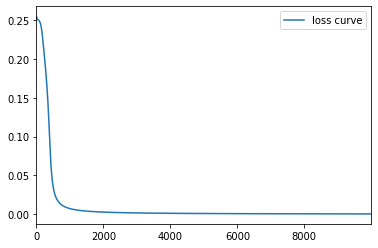

In [46]:
import numpy as np
from past.builtins import xrange


# XOR gate 
X = np.array(([0, 0], [0, 1], [1, 0], [1,1]), dtype=float)
y = np.array(([0], [1], [1], [0]), dtype=float)


class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (2x3) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o 

  def sigmoid(self, s):
    # activation function 
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propgate through the network
    self.o_error = y - o # error in output
    
    
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train (self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

NN = Neural_Network()
err_List = []
for i in xrange(10000): # trains the NN 1,000 times
  print ("Input: \n" + str(X)) 
  print ("Actual Output: \n" + str(y)) 
  print ("Predicted Output: \n" + str(NN.forward(X))) 

  
  
  Loss = np.mean(np.square(y - NN.forward(X)))
 
  print ("Loss: \n" + str(Loss)) # mean sum squared loss
  err_List.append(Loss)
  print ("\n")
  NN.train(X, y)

print(NN.W1)
print(NN.W2)


pd.DataFrame(err_List, columns=['loss curve']).plot()



#### Shape of weights 

In [44]:
import numpy as np
w1 = np.array([[ -1.04498499,   4.54688955, -10.68574281],
 [ -1.03038431, -10.18027638,   4.79495373]])

In [45]:
w1.shape

(2, 3)

In [47]:
w2 = np.array([[-10.97116601],
 [ 15.11191805],
 [-10.95547588]])

In [48]:
w2.shape

(3, 1)